# Seaborn basics
***

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid') # Para que los plots tengan una grilla de fondo

## Plots de distribución

En Seaborn existen muchos tipos de plots entre los cuales estan los de distribucion, estos son:

* displot
* jointplot
* kdeplot
* pairplot
* rugplot

### Obteniendo la data:

Este dataframe contiene la informacion de el total de pago, la propina, el sexo del cliente, si el cliente es fumador o no, el dia, el tipo de comida y la cantidad de personas en un restaurante. Con este dataframe se pueden hacer cosas interesantes como ver quienes dan mas propina, si el hecho de que fumen influye en algo, etc.

In [5]:
# Dataframe obtenido de kaggle: https://www.kaggle.com/jsphyg/tipping

df = pd.read_csv('Dataframes/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Displot
Este tipo de plots nos muestra la distribucion de nuestro set de observación

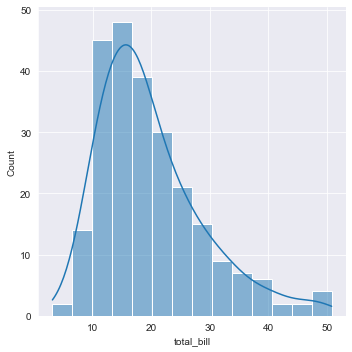

In [8]:
"""
    sns.distplot(data=nuestro dataframe, x='variable a observar'
    , kde=True->nos traza una linea de distribucion) 
"""
# Plot basico de distribucion de el gasto
sns.displot(data=df, x='total_bill', kde=True)

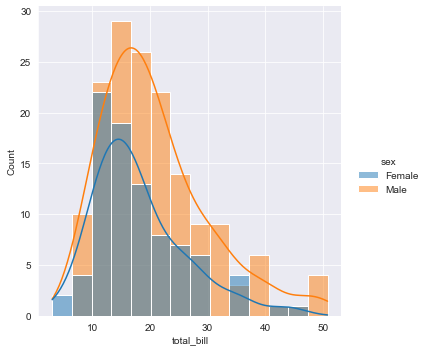

In [9]:
# Agregando hue a nuestro plot. hue=variable, sirve para separar el plot por ejemplo por sexo
sns.displot(data=df, x='total_bill',hue='sex', kde=True,)

### Jointplot
Jointplot nos permite juntar dos displots en uno para visualizar la correlacion entre ellos. Este tipo de plots se puede presentar en distintos estilos:
* scatter
* reg
* resid
* kde
* hex

de los cuales los mas usados son scatter, hex y reg

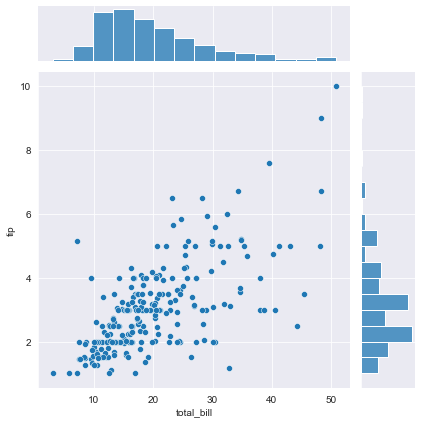

In [10]:
"""
    sns.jointplot(x=primera variable, y=secunda variable, data=dataframe, kind=tipo(scatter, reg, etc))
"""

# Jointplot del total del gasto y la propina del tipo scatter

sns.jointplot(x='total_bill', y='tip', data=df, kind='scatter')

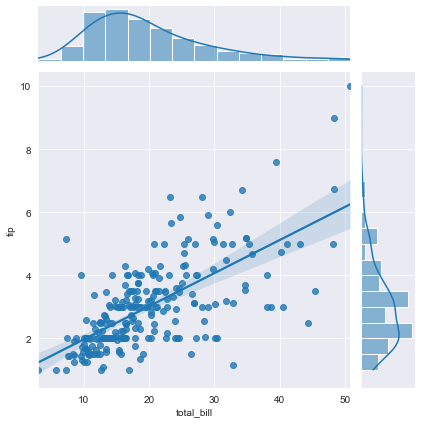

In [11]:
# Jointplot del total del gasto y la propina del tipo reg

sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')

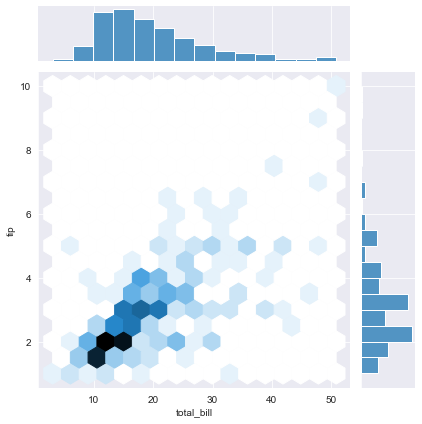

In [12]:
# Jointplot del total del gasto y la propina del tipo hex

sns.jointplot(x='total_bill', y='tip', data=df, kind='hex')

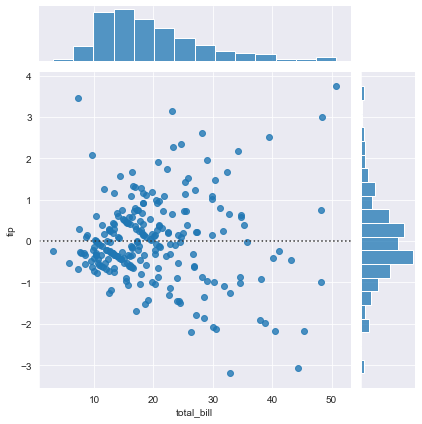

In [13]:
# Jointplot del total del gasto y la propina del tipo resid

sns.jointplot(x='total_bill', y='tip', data=df, kind='resid')

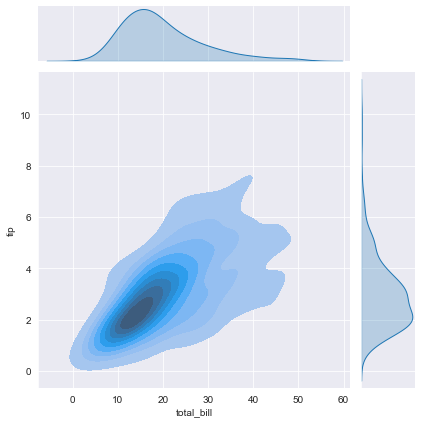

In [14]:
# Jointplot del total del gasto y la propina del tipo kde

sns.jointplot(x='total_bill', y='tip', data=df, kind='kde', fill=True)

### Pairplot
Pairplot nos permite visualizar la relacion entre las variables numericas de nuestro dataframe (mientras mas existan, mas complejo se pondrá el plot)

<Figure size 2880x720 with 0 Axes>

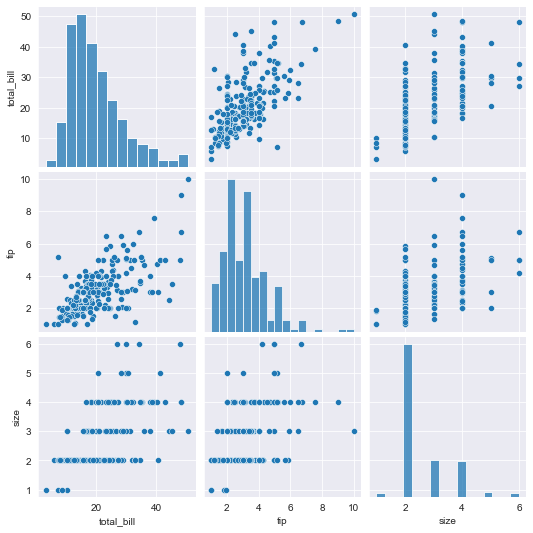

In [16]:
# Podemos cambiar el tamaño, el dpi, el titulo, etc de nuestra figura llamando a plt.figure
plt.figure(figsize=(12,3), dpi=240)
sns.pairplot(df)

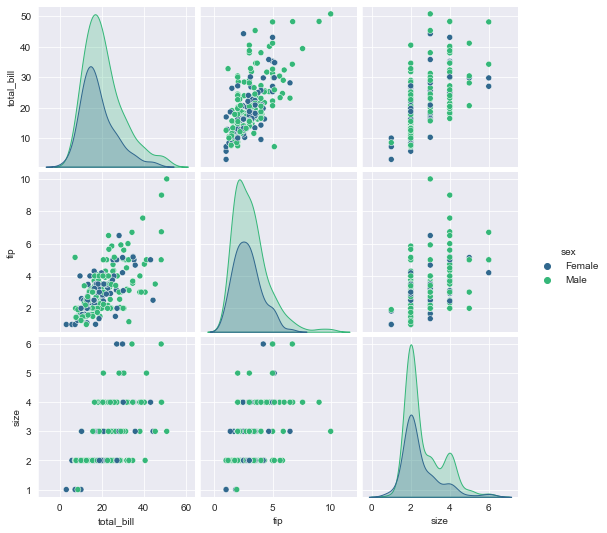

In [17]:
# Pairplot con hue=sex -> todas las variables numericas separadas por sexo
sns.pairplot(data=df, hue='sex', palette='viridis')

#palette es el estilo que colores que usaremos(solo al aplicar hue o comparar 2 o mas variables)

# ver https://seaborn.pydata.org/tutorial/color_palettes.html para explorar las paltas de colores disponibles

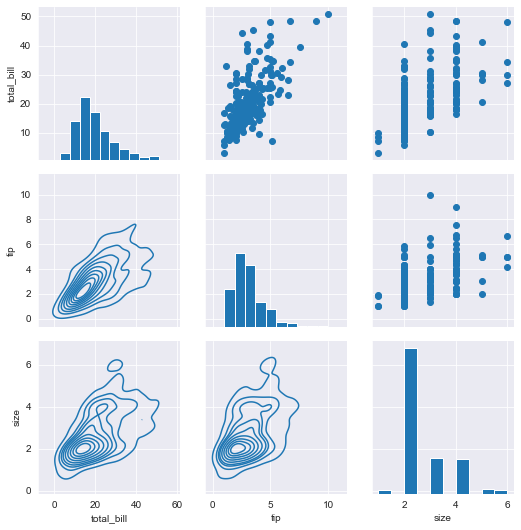

In [103]:
# Además podemos personalizar nuestro pairgrid estableciendo los graficos que nosotros estimemos.
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)


### Rugplot
Rugplot es un tipo de plot muy sencillo que de hecho se puede incluir en displot(rug=True), simplemente nos muestra una linea vertical por cada punto de la distribucion de nuestra variable a estudiar

<AxesSubplot:xlabel='tip'>

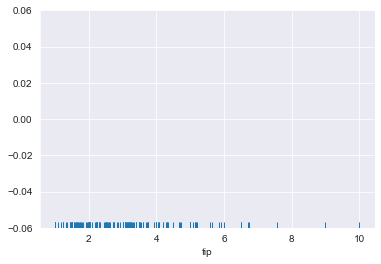

In [18]:
sns.rugplot(x='tip', data=df)

## Plots para datos categoricos
Seaborn posee ciertos tipos de plots para tratar con datos categoricos, como sexo, dia, si es fumador o no, tipo de comida. Normalmente estos tipos de datos se asocian a uno numerico para visualizar ciertas tendencias en relacion a estos datos categoricos. Existen diferentes tipos de plots para este segmento:

* barplot
* boxplot
* countplot
* catplot
* stripplot
* swarmplot
* violinplot

### Barplot
Permite graficar en forma de barras una variable categorica con una numerica para visualizar ciertas tendencias

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

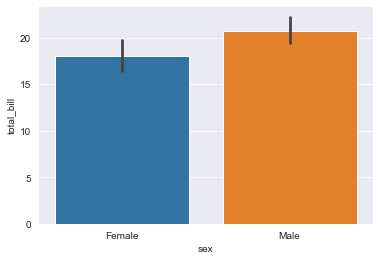

In [19]:
"""
    sns.barplot(x,y,data,hue=opcional, palette=opcional)
"""

# Barplot del total gastado por sexo

sns.barplot(x='sex', y='total_bill', data=df)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

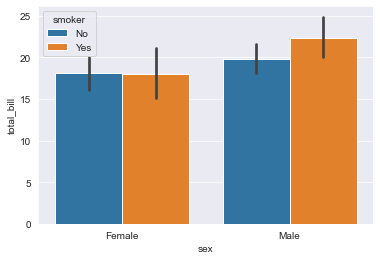

In [20]:
# Barplot del total gastado por sexo, con un hue de si es fumador o no

sns.barplot(x='sex',y='total_bill',hue='smoker',data=df)

### Boxplot
Muestra la distribucion de la data categorica. la caja muestra el quartil del dataset y la mediana, los brazos muestran el resto de la distruibuicion. Las lineas horizontales en los brazos indican el minimo y el máximo, los puntos que se separan de los brazos son los valores extremos.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

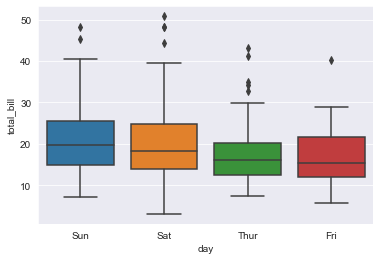

In [21]:
"""
    sns.boxplot(x,y,data,hue(opcional), orient(opcional, h: hotizontal por defecto vertical), palette(opcional))
"""

# Boxplot del dia en relación al total gastado

sns.boxplot(x='day',y='total_bill',data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

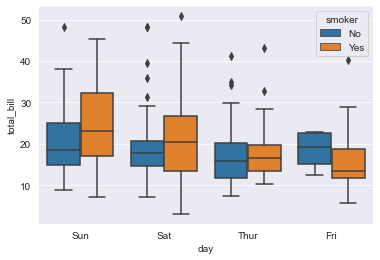

In [22]:
# Boxplot del día en relacion al total gastado separado por fumador y no fumador

sns.boxplot(x='day', y='total_bill', hue='smoker', data=df )

### Countplot
Los countplot son muy parecidos a los barplot en aspecto, pero, estos sirven para contar variables en especifico. Por ejemplo cantidad de fumadores.

<AxesSubplot:xlabel='smoker', ylabel='count'>

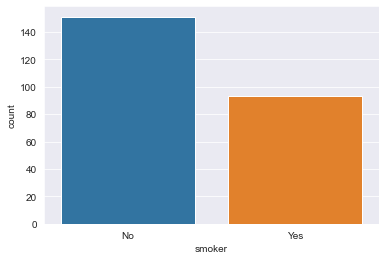

In [23]:
# Countplot del total de fumadores

sns.countplot(x='smoker', data=df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

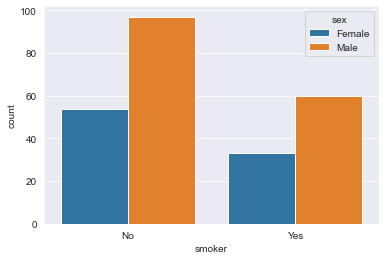

In [30]:
# Además pueden ser separados por un hue, por ejemplo por sexo

sns.countplot(x='smoker', hue='sex', data=df)

### Catplot
catplot es una especie de plot adaptable, podemos pasar la variable kind para determinar el tipo. Por defecto será un strip plot

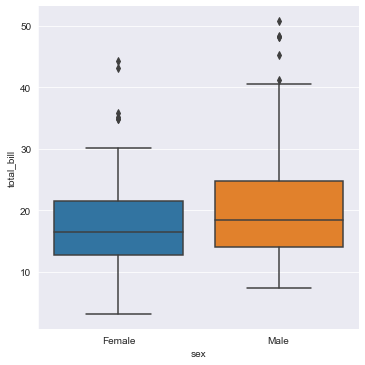

In [25]:
sns.catplot(x='sex', y='total_bill', data=df, kind='box')

### Stripplot
Los stripplots marcarán una dispersion por cada variable categorica. Si vien el stripplot puede ser graficado por si solo, suele ser un buen complemento para los boxplots y violinplots.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

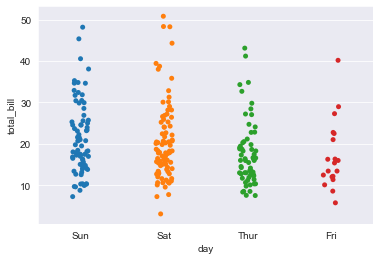

In [26]:
"""
    sns.stripplot(x,y,data,hue, jitter=True(por defecto True, para que los datos se dispersen y no se amontonen))
"""
# Stripplot del total gastado por día

sns.stripplot(x='day',y='total_bill',data=df)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

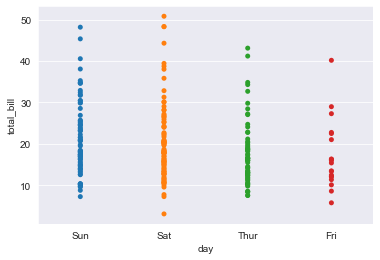

In [27]:
# Stripplot del total gastado por día sin jitter

sns.stripplot(x='day', y='total_bill',data=df,jitter=False)

<AxesSubplot:xlabel='size', ylabel='tip'>

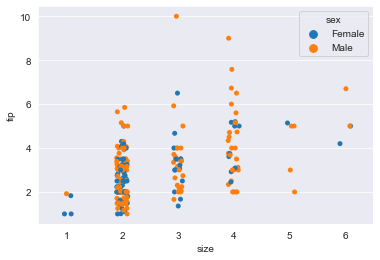

In [28]:
# Stripplot de la propina segun la cantidad de personas, separado por sexo.

sns.stripplot(x='size', y='tip', hue='sex', data=df)

<AxesSubplot:xlabel='size', ylabel='tip'>

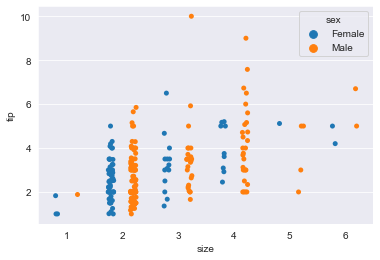

In [34]:
# Además podemos separar el stripplots segun el hue con dodge=True

sns.stripplot(x='size', y='tip', hue='sex', dodge=True, data=df)

<AxesSubplot:xlabel='day', ylabel='tip'>

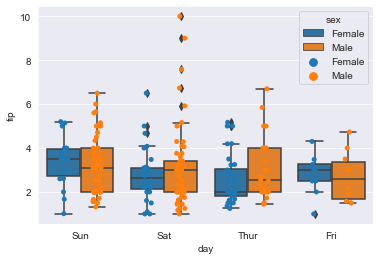

In [36]:
# Stripplot combinado con un boxplot de propinas por dia segarados por sexo

sns.boxplot(x='day', y='tip', hue='sex', data=df)
sns.stripplot(x='day', y='tip', hue='sex', dodge=True, data=df)

### Swarmplot
Es muy similar a stripplot, la diferencia está en que los puntos los ajusta por lo que no se superponen, la limitante de este tipo de plot es la cantidad de datos, ya que graficamente con muchos datos no se ve bien, además el calculo matematico que realiza para ordenar los puntos es muy complejo para un dataset muy grande.

<AxesSubplot:xlabel='day', ylabel='tip'>

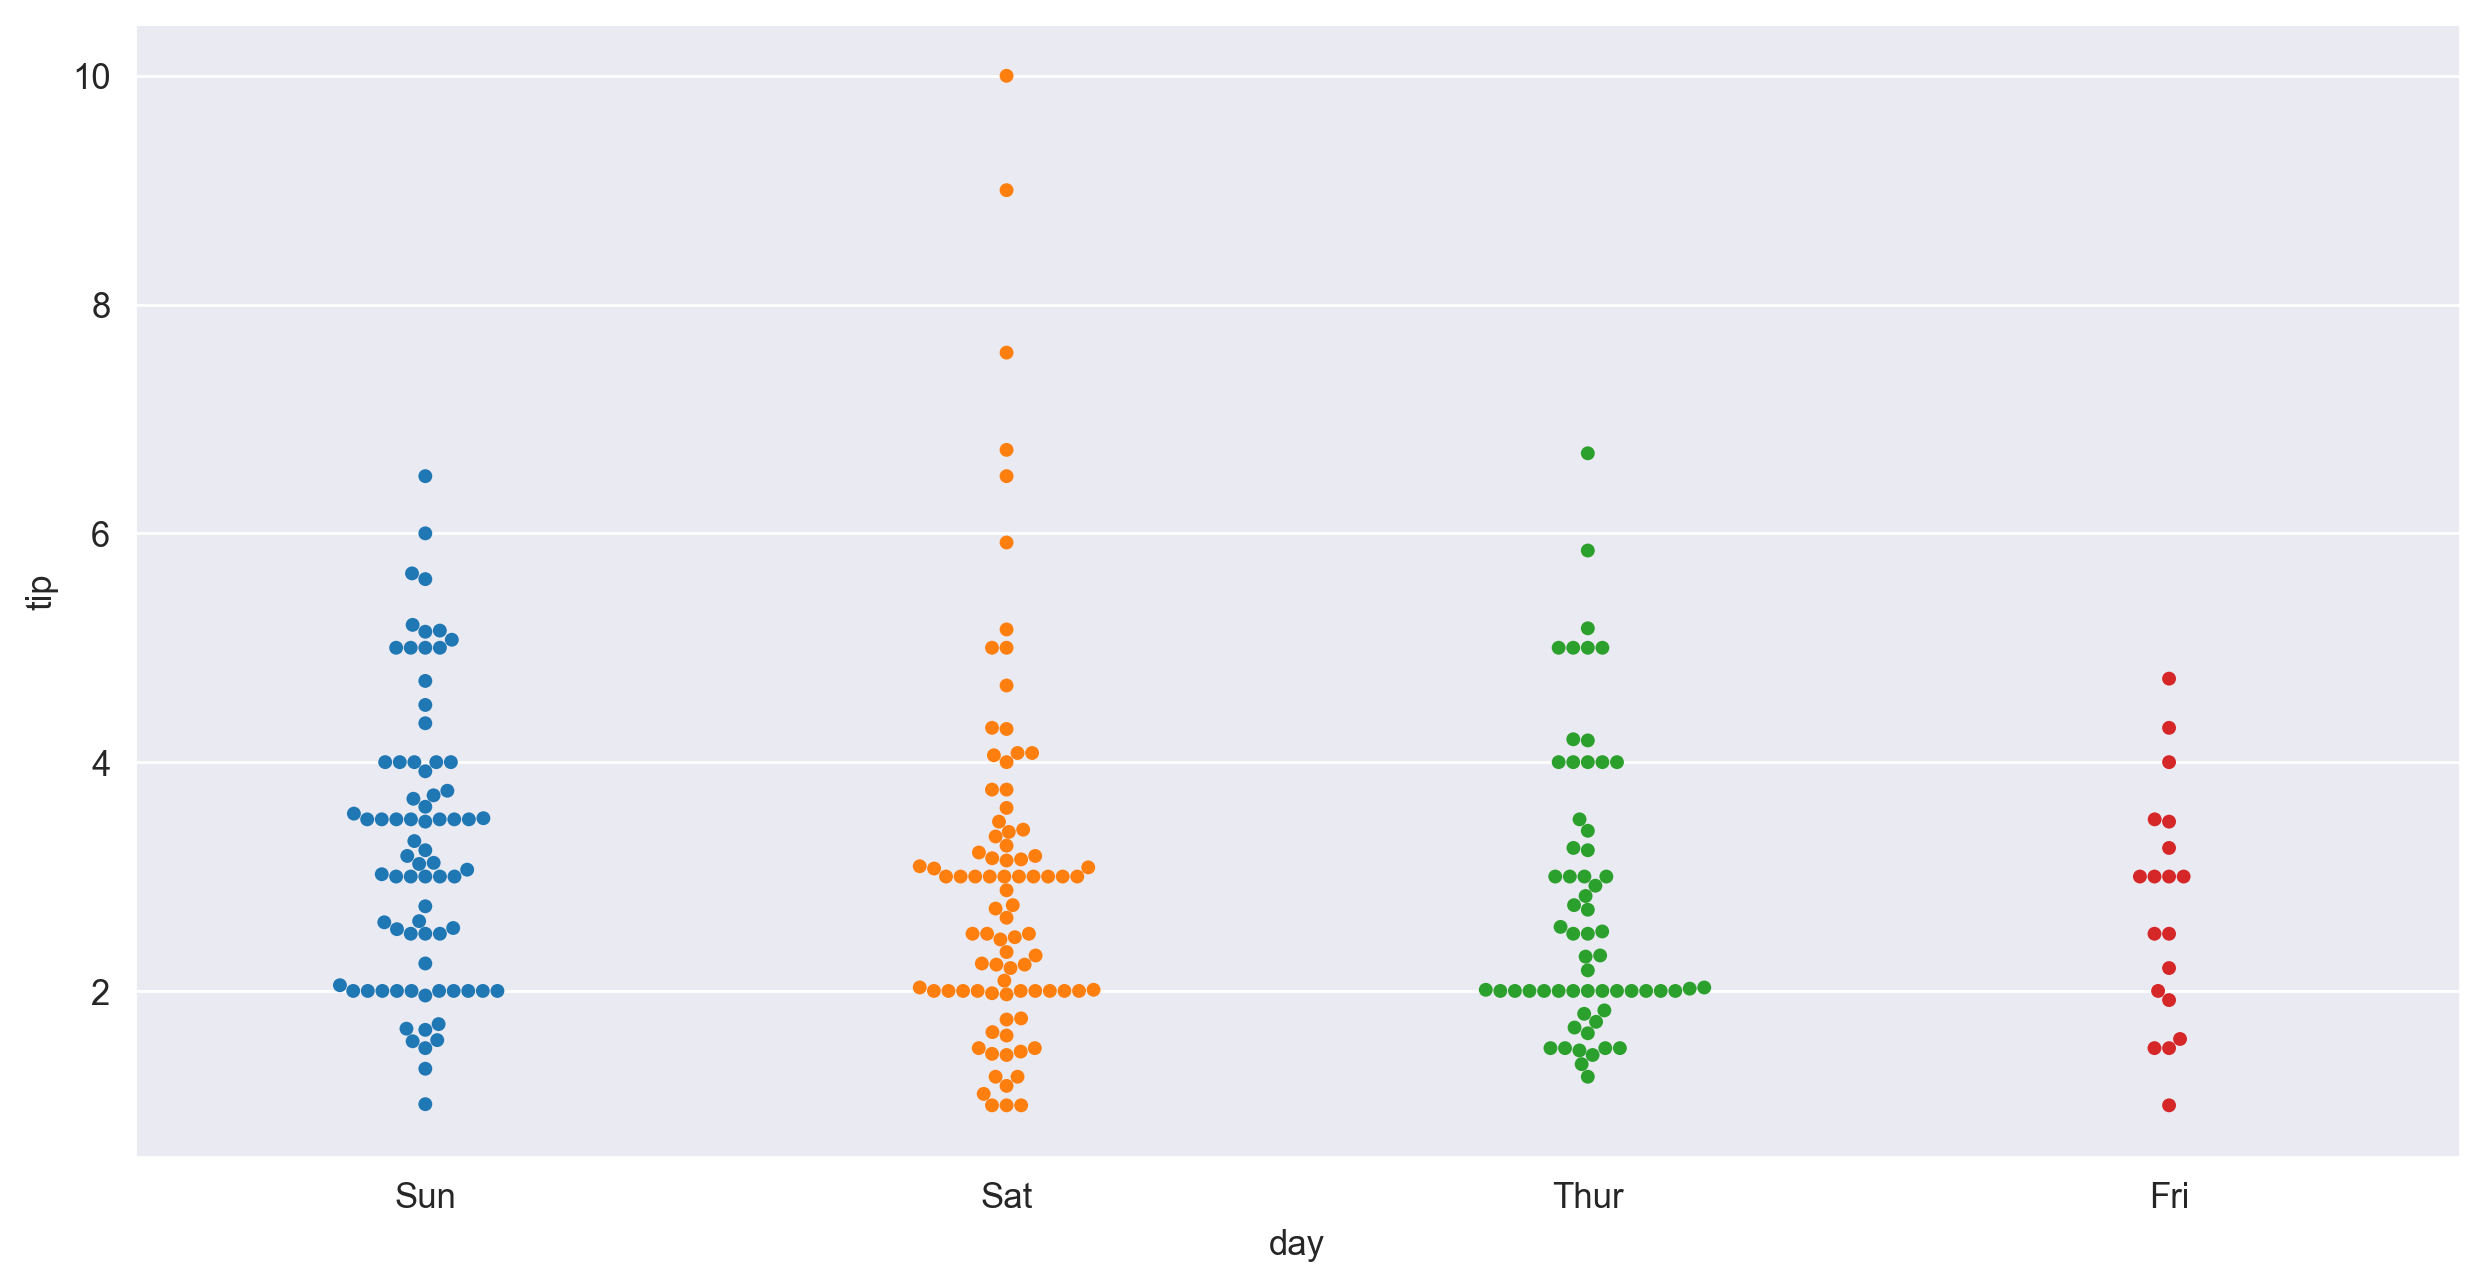

In [48]:
"""
    sns.swarmplot(x,y,hue,split, size=5(por defecto, este normalmente se ajusta para que todos los puntos caigan))
"""

# Swarmplot de propina por dia, este generará un warning con size=5 
# porque el dataset es muy grande para un swarmplot

plt.figure(figsize=(12,6), dpi=250)
sns.swarmplot(x='day', y='tip', data=df, size=4)

<AxesSubplot:xlabel='day', ylabel='tip'>

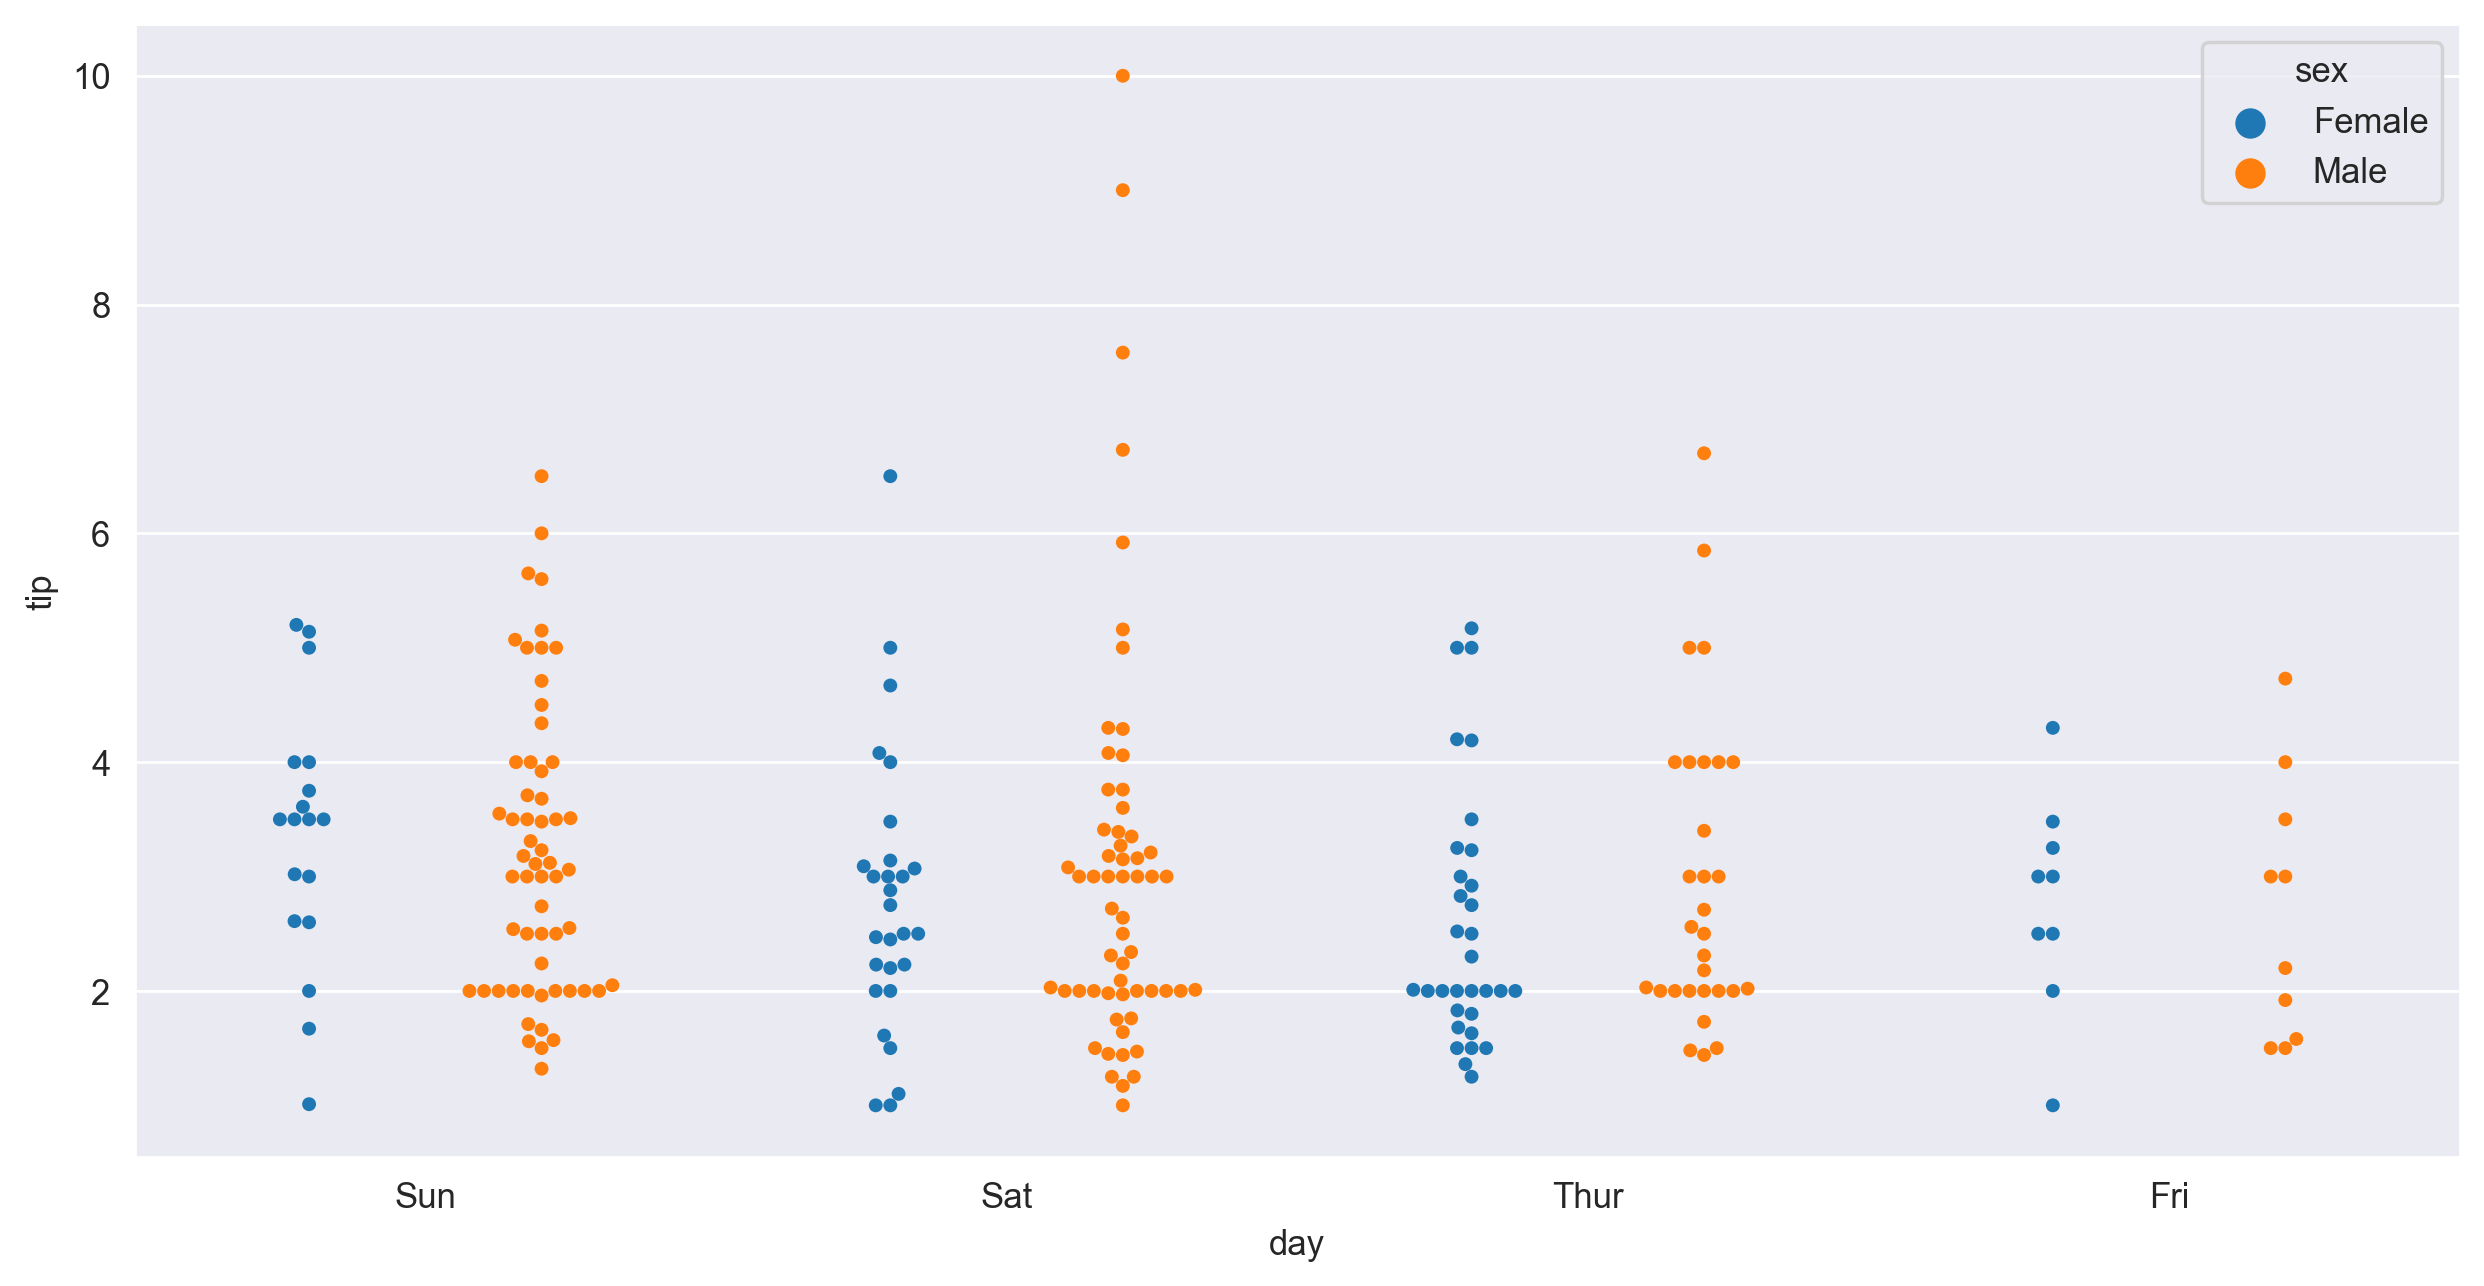

In [49]:
# Swarmplot de propina por dia separado por sexo

plt.figure(figsize=(12,6), dpi=250)
sns.swarmplot(x='day', y='tip', hue='sex', data=df, size=4, dodge=True)

<AxesSubplot:xlabel='day', ylabel='tip'>

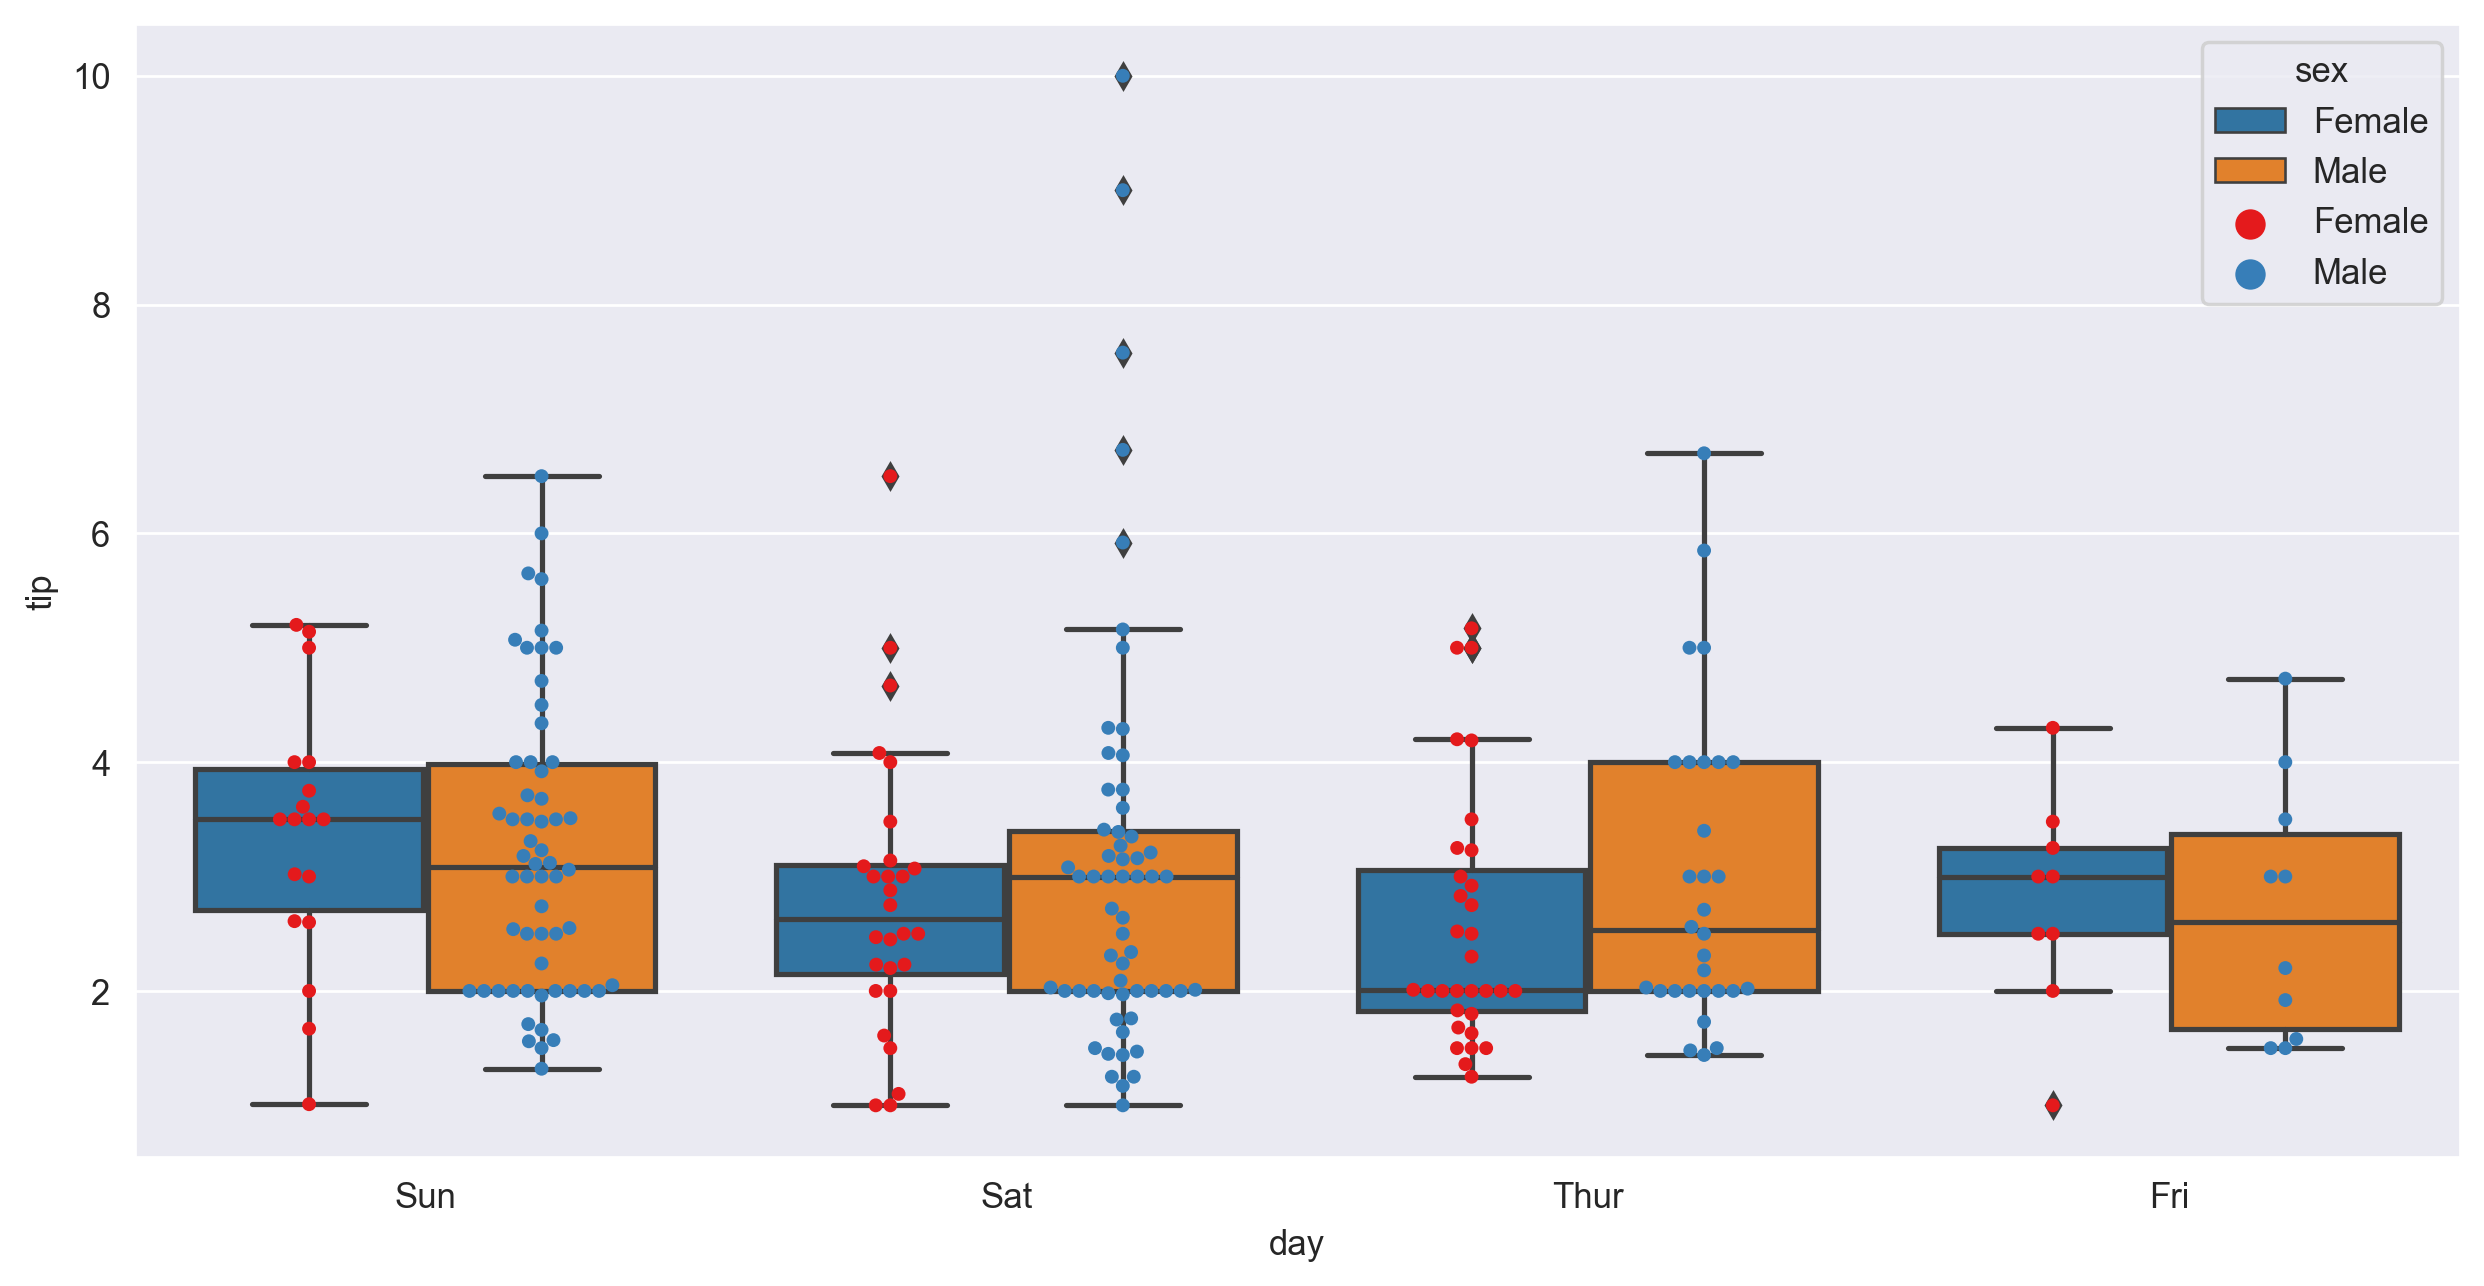

In [54]:
# Swarmplot combinado con un boxplot de propinas por dia segarados por sexo

plt.figure(figsize=(12,6), dpi=250)
sns.boxplot(x='day', y='tip', hue='sex', data=df)
sns.swarmplot(x='day', y='tip', hue='sex', size=4, dodge=True, data=df, palette='Set1')

<AxesSubplot:xlabel='tip', ylabel='day'>

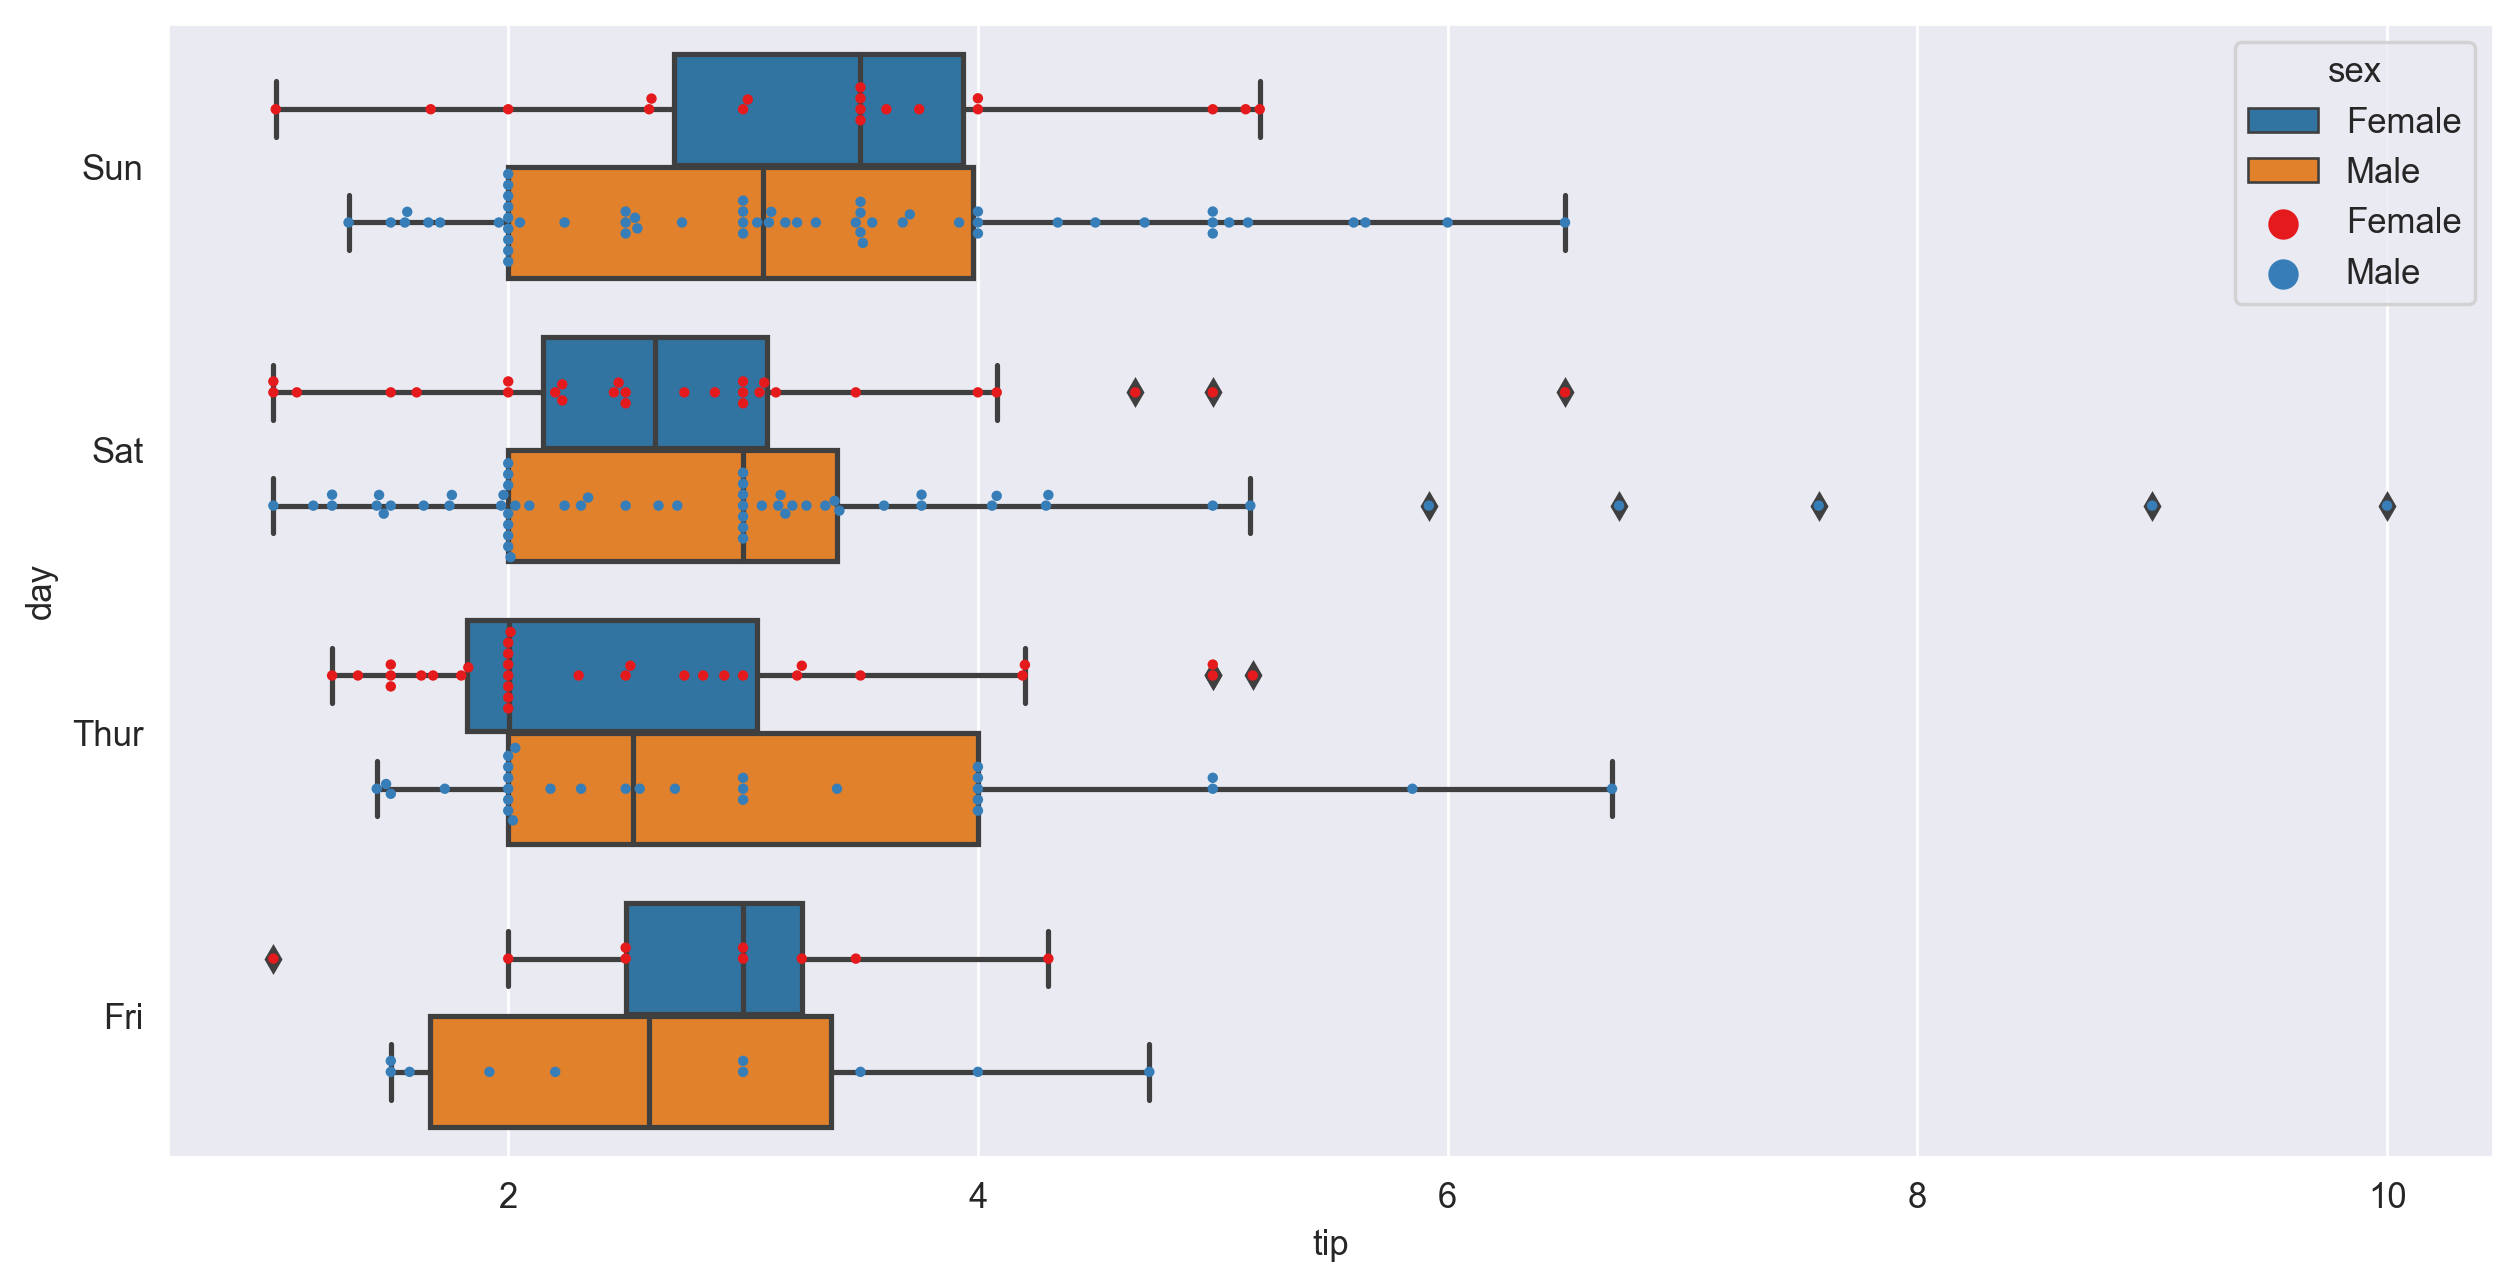

In [69]:
# Swarmplot combinado con un boxplot de propinas por dia segarados por sexo visualizado horizontalmente

plt.figure(figsize=(12,6), dpi=250)
sns.boxplot(x='tip', y='day', hue='sex',orient='h', data=df)
sns.swarmplot(x='tip', y='day', hue='sex', size=3, dodge=True,orient='h', data=df, palette='Set1')

### Violinplot
Un grafico de violin se utiliza para visualizar la distribución de los datos y su densidad de probabilidad.
Es parecido al boxplot. al centro se encuentra la mediana, el ancho del grafico determina que tan grande es la frecuencia.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

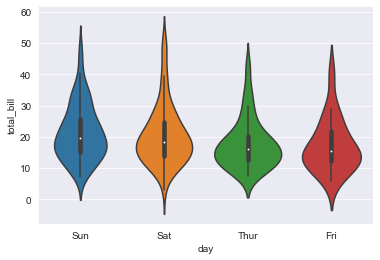

In [55]:
"""
    sns.violinplot(x,y,hue,data,dodge,orient)
"""

# Violin plot del total gastado por día

sns.violinplot(x='day', y='total_bill', data=df)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

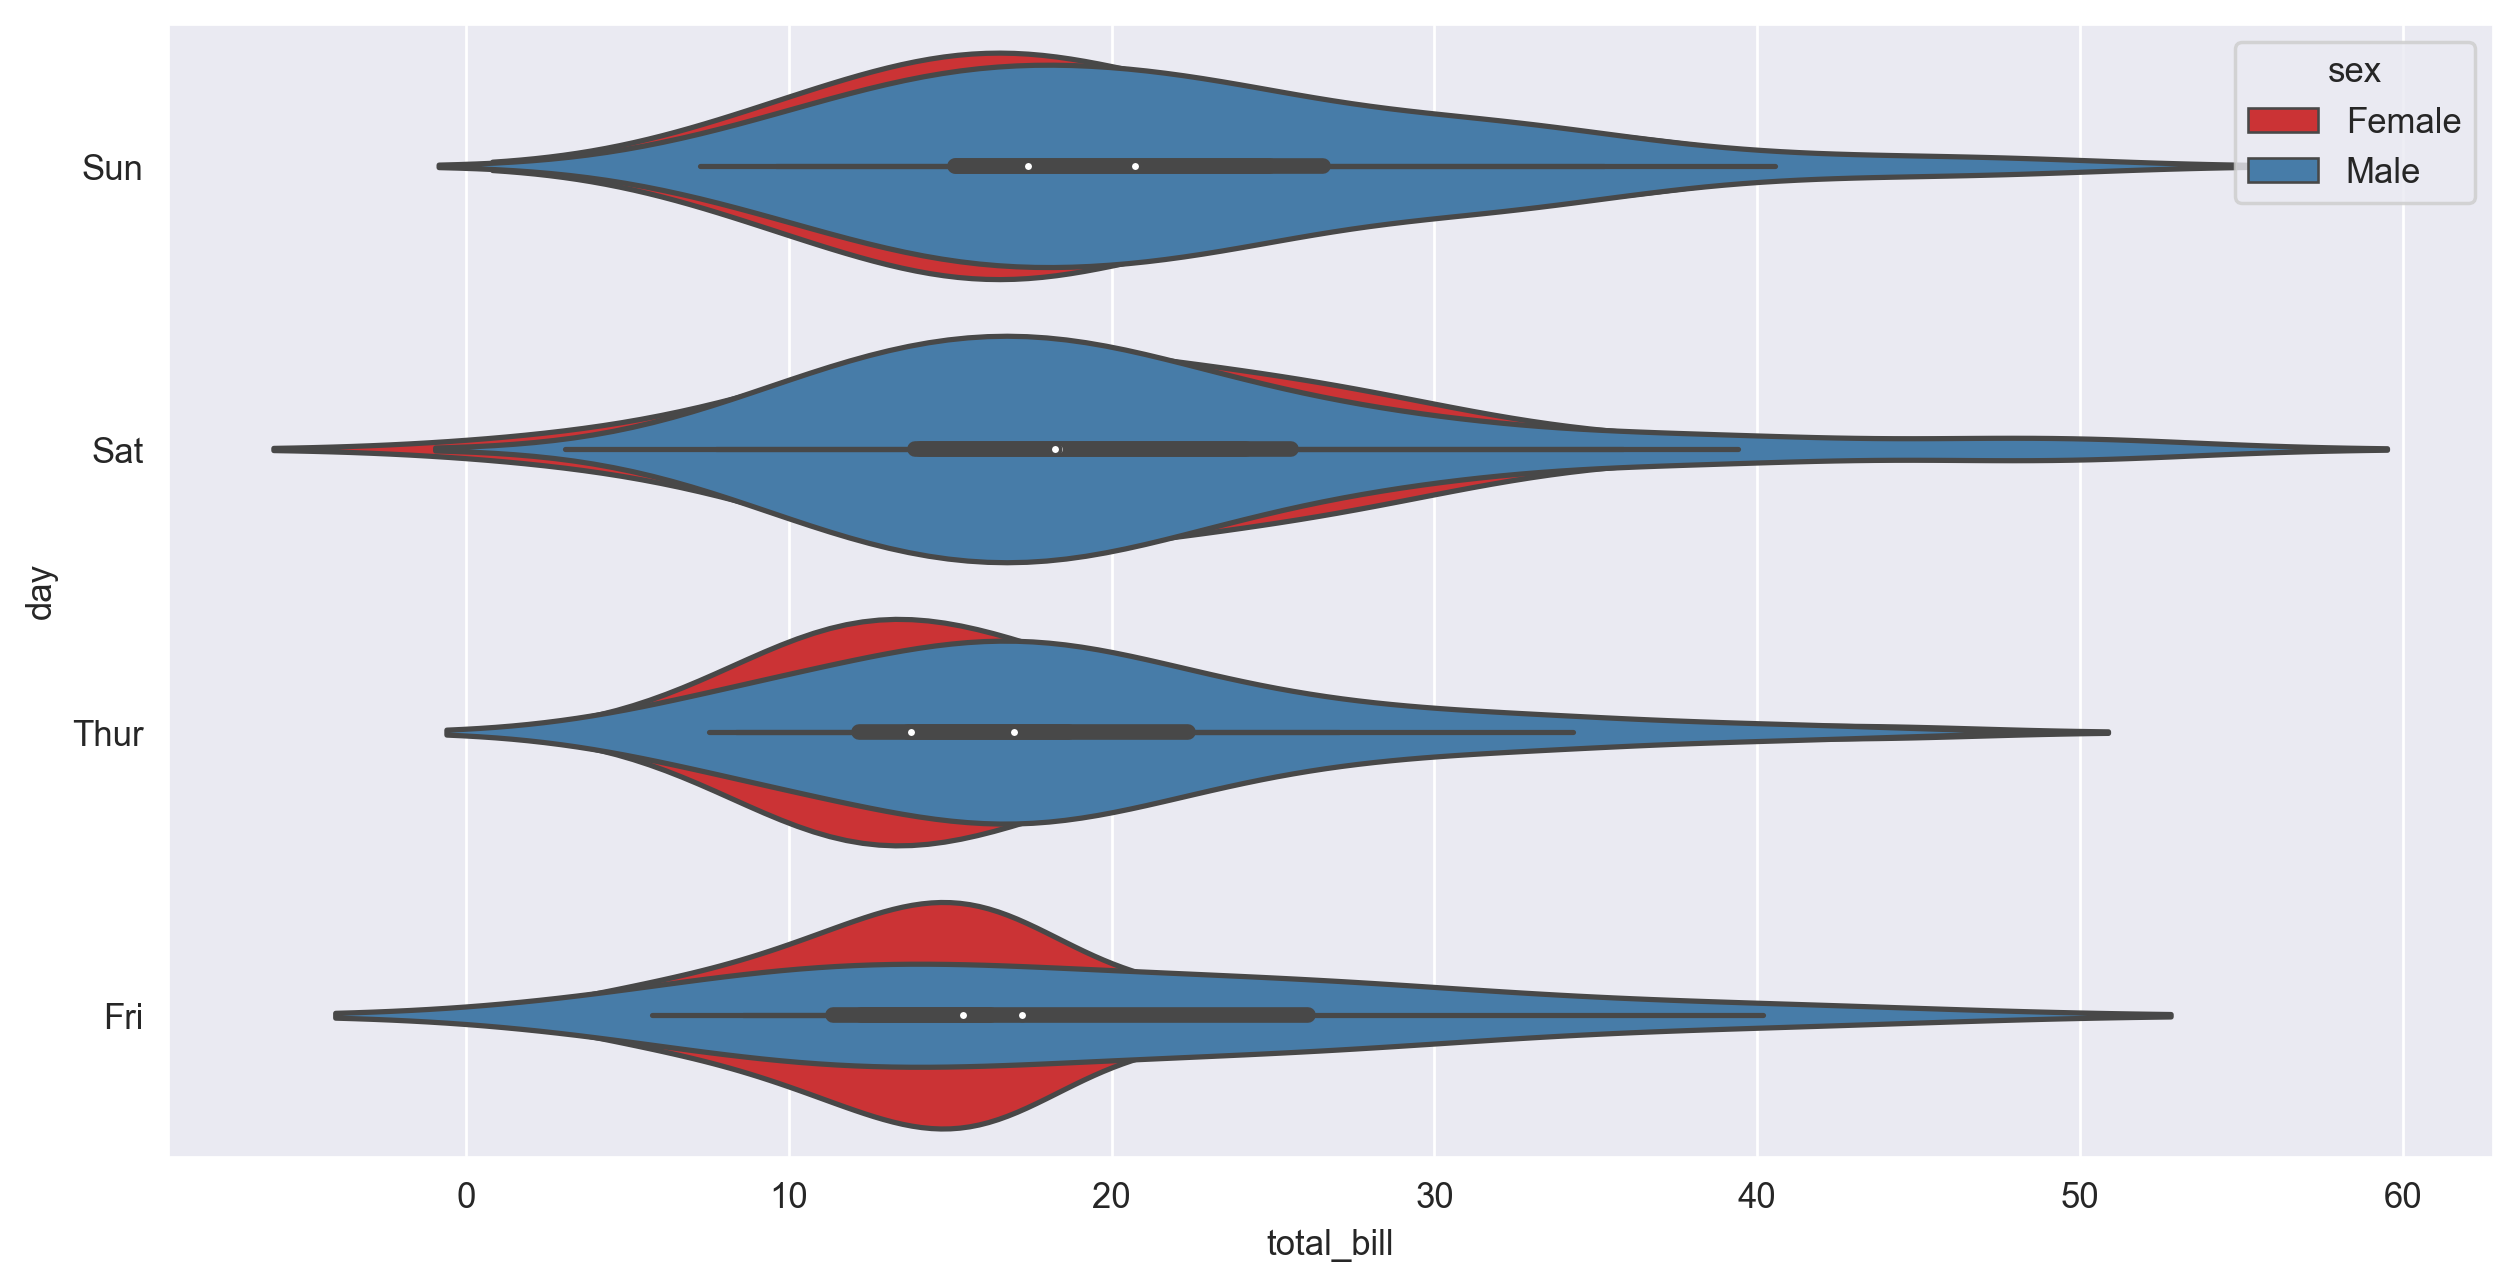

In [60]:
# Violin plot del total gastado por dia separado por sexo, visualizado horizontalmente

plt.figure(figsize=(12,6), dpi=250)
sns.violinplot(x='total_bill', y='day', hue='sex', palette='Set1',dodge=False, orient='h', data=df)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

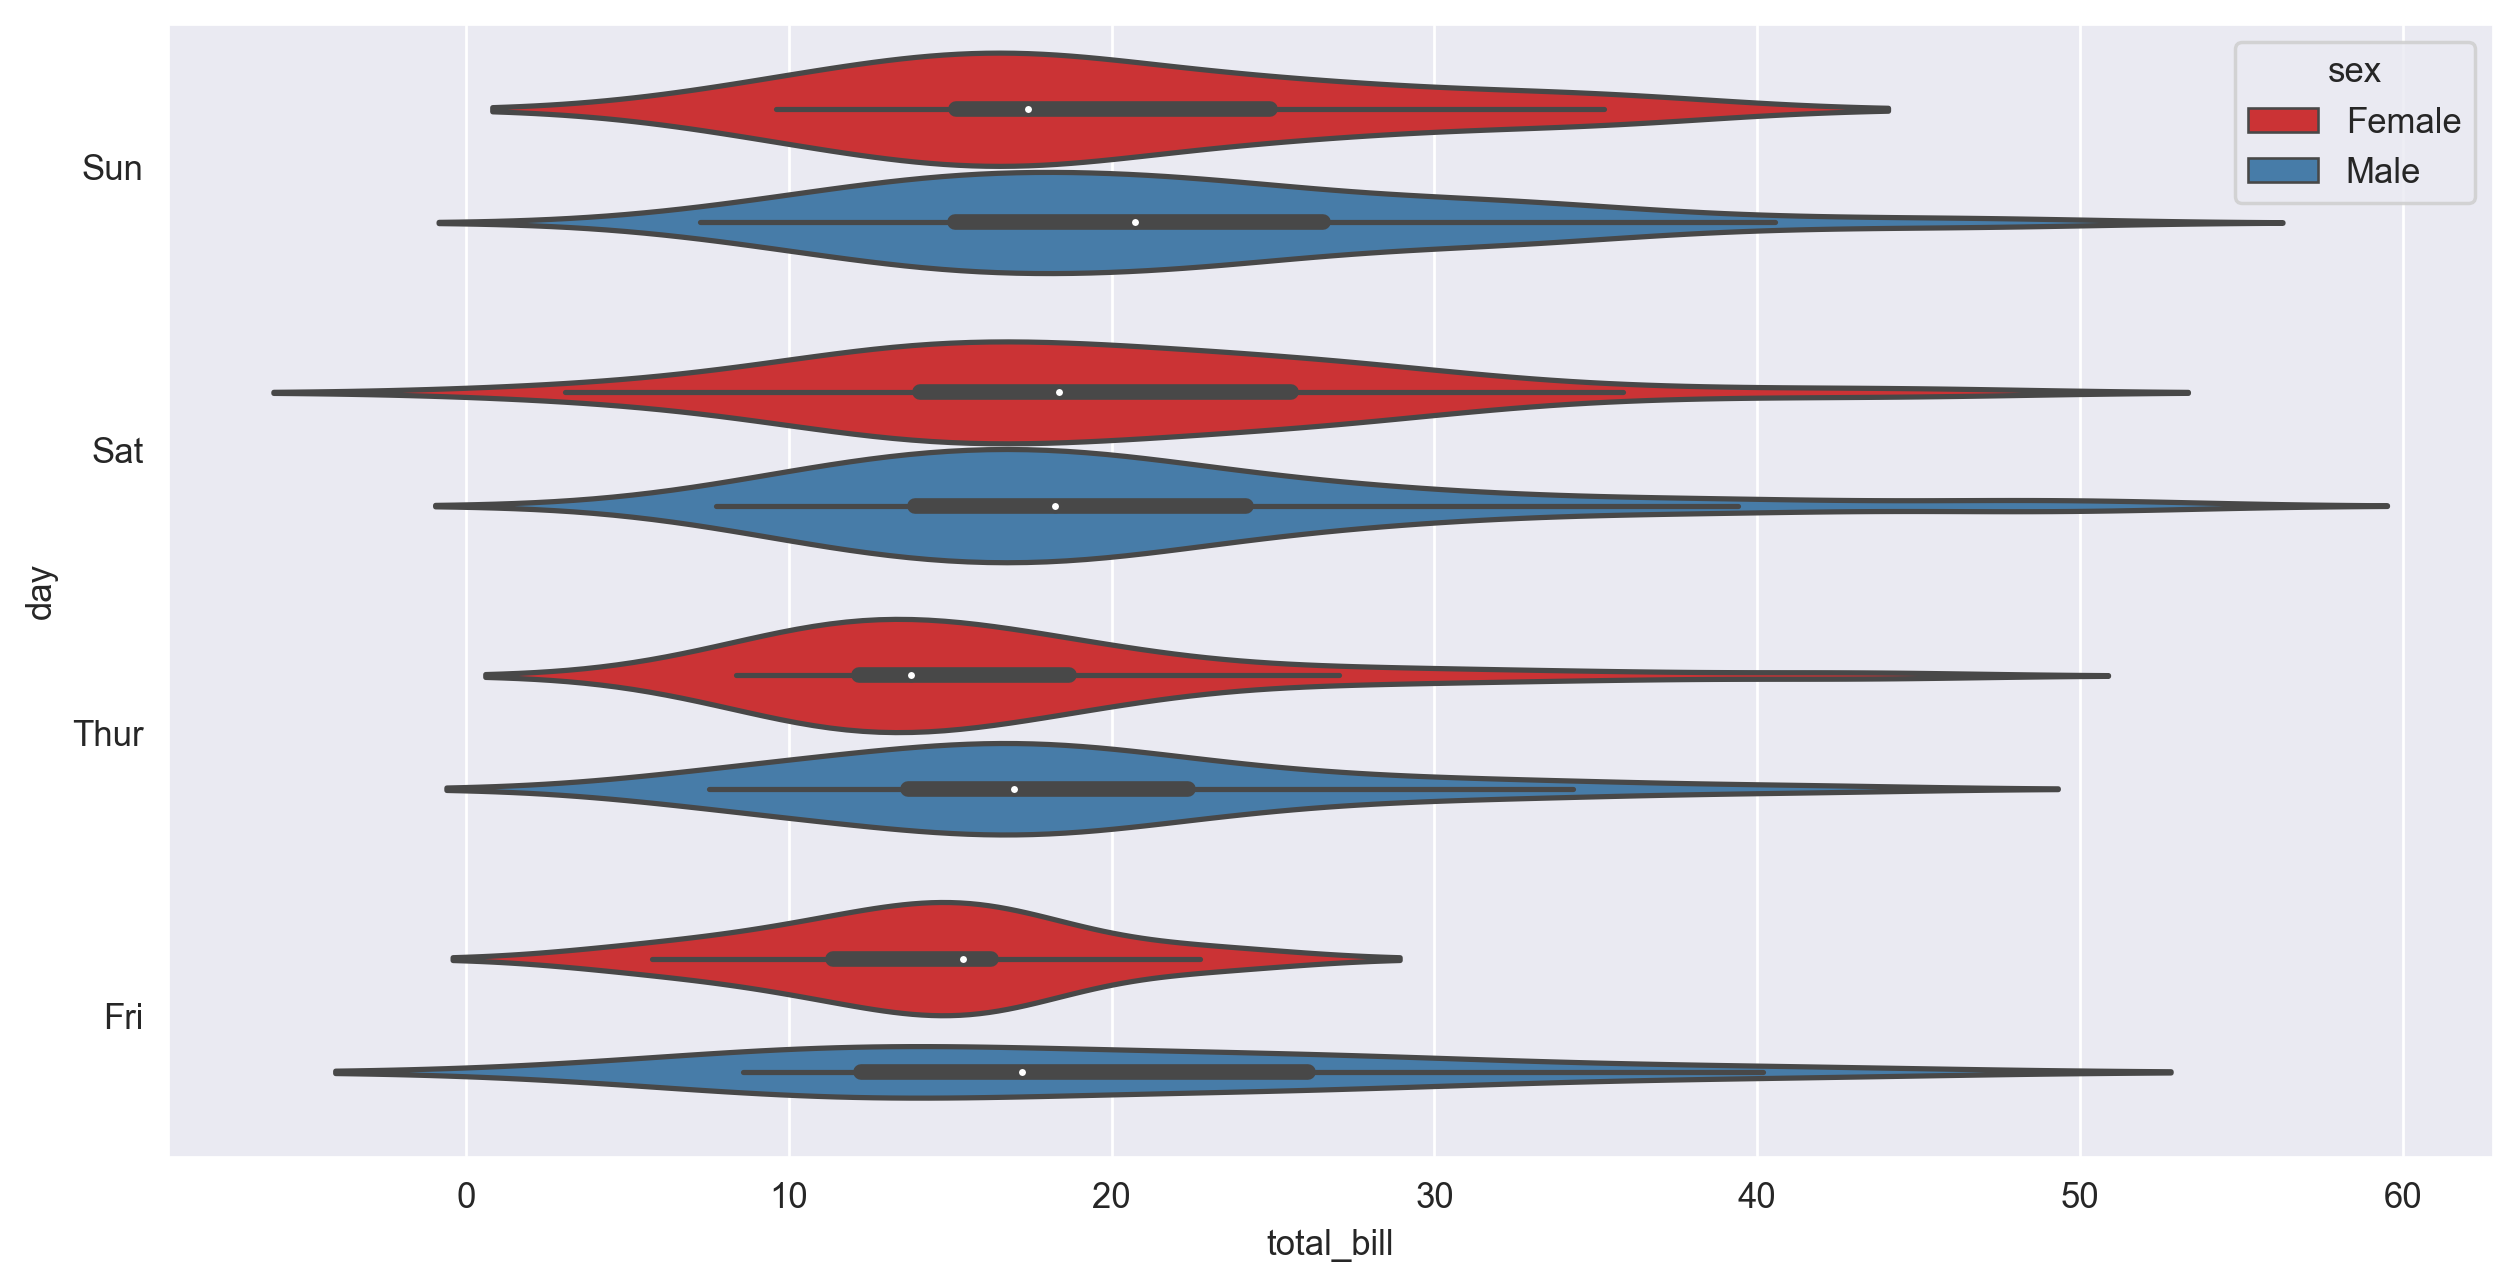

In [61]:
plt.figure(figsize=(12,6), dpi=250)
sns.violinplot(x='total_bill', y='day', hue='sex', palette='Set1', orient='h', data=df)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

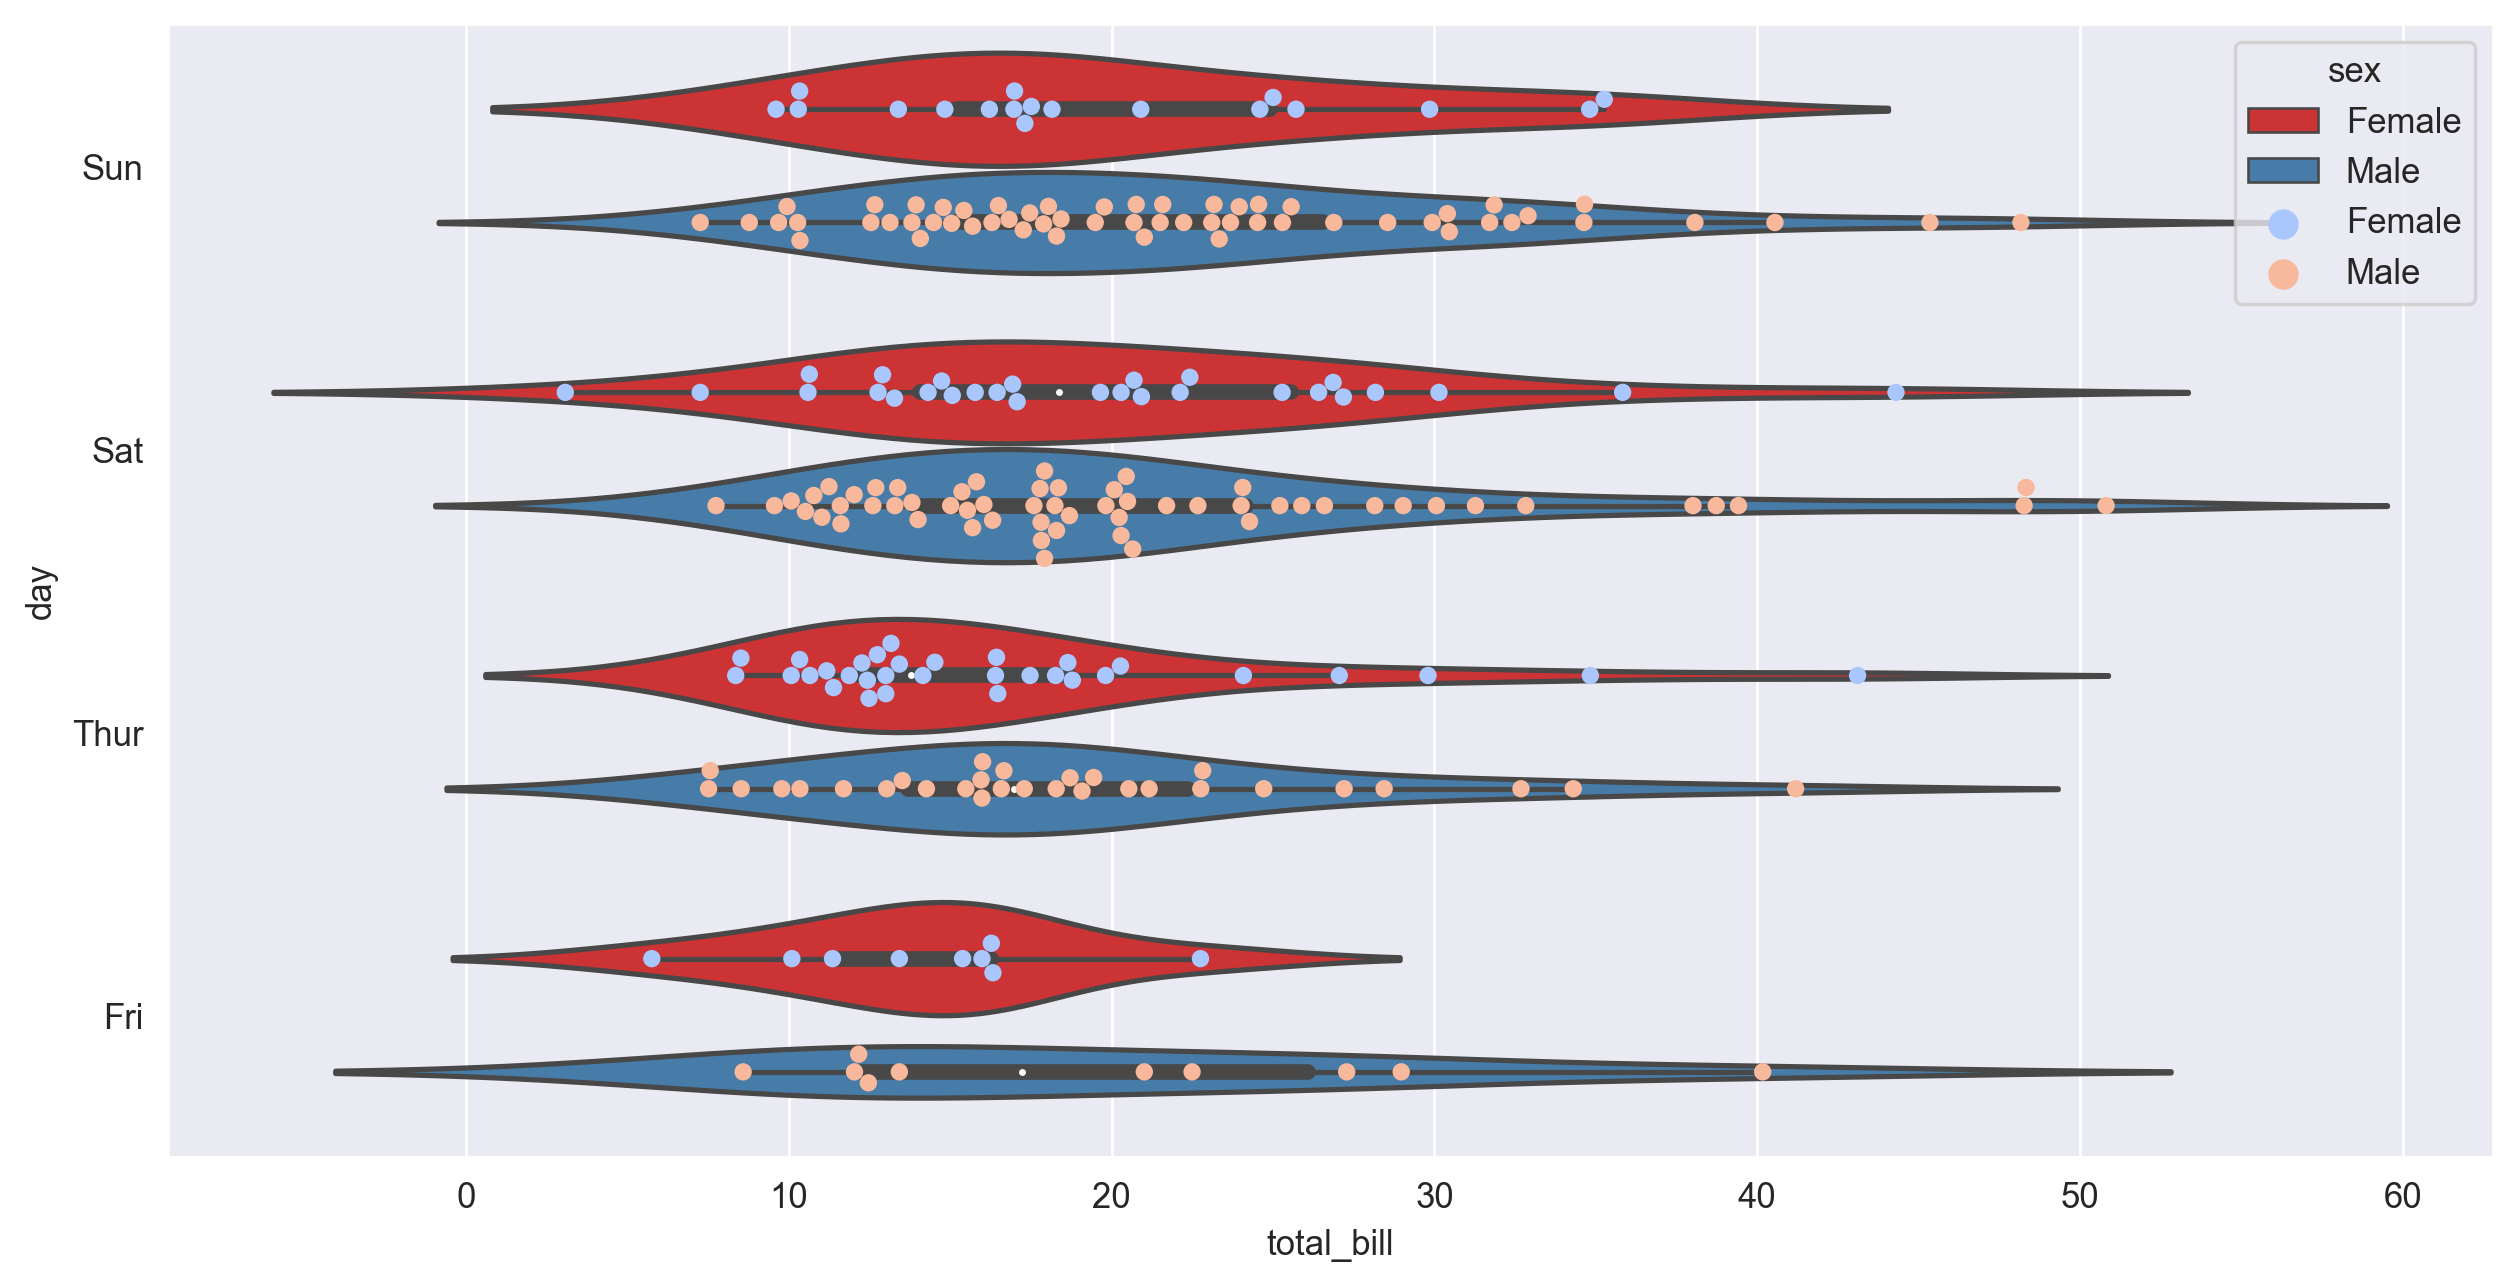

In [67]:
# Violinplot combinado con un swarmplot

plt.figure(figsize=(12,6), dpi=250)
sns.violinplot(x='total_bill', y='day', hue='sex', palette='Set1', orient='h', data=df)
sns.swarmplot(x='total_bill', y='day', hue='sex', size=5, dodge=True,orient='h', data=df, palette='coolwarm')



## Plots del tipo matricial
Entre los plots matriciales tenemos graficos muy utiles como el mapa de calor que nos sirve para visualizar datos faltantes, correlaciones o intensidad de datos. Los plots matriciales son:

* Heatmap

* Clustermap

### Heatmap
Es uno de los mas conocidos por su gran utilidad. Para que este funcione el dataframe se debe presentar como matriz y solo aplicado a datos numericos.

<AxesSubplot:>

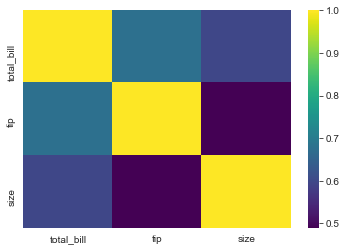

In [71]:
"""
    sns.heatmap(df, cmap, annot=False(por defecto, si cambia por True entrega los valores por casilla))
"""
# Heatmap de la correlacion entre el total gastado, la propina y cantidad de personas

sns.heatmap(df.corr(), cmap='viridis')

<AxesSubplot:>

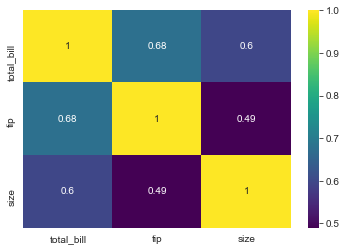

In [72]:
# Heatmap con los valores correspondientes en cada casilla

sns.heatmap(df.corr(), cmap='viridis', annot=True)

### Para poder trabajar de mejor manera se cargará el dataframe de vacunaciones por pais que tiene mas datos (donde se lucen los plots matriciales)

In [74]:
# Dataframe obtenido de: https://www.kaggle.com/gpreda/covid-world-vaccination-progress?select=country_vaccinations.csv

df2 = pd.read_csv('dataframes/country_vaccinations.csv')
df2

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967,Zimbabwe,ZWE,2021-03-07,32240.0,32240.0,NaN,226.0,1914.0,0.22,0.22,NaN,129.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1370088320...
5968,Zimbabwe,ZWE,2021-03-08,35518.0,35518.0,NaN,3278.0,2009.0,0.24,0.24,NaN,135.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1370088320...
5969,Zimbabwe,ZWE,2021-03-09,35761.0,35761.0,NaN,243.0,1526.0,0.24,0.24,NaN,103.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1370088320...
5970,Zimbabwe,ZWE,2021-03-10,35901.0,35901.0,NaN,140.0,1133.0,0.24,0.24,NaN,76.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1370088320...


In [75]:
df2.corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.989494,0.937211,0.893772,0.944592,0.181403,0.190169,0.083853,0.109836
people_vaccinated,0.989494,1.000000,0.876978,0.898548,0.953093,0.175893,0.203981,0.053588,0.109124
people_fully_vaccinated,0.937211,0.876978,1.000000,0.819594,0.865396,0.130979,0.109613,0.151294,0.089911
daily_vaccinations_raw,0.893772,0.898548,0.819594,1.000000,0.950530,0.093146,0.105219,0.025333,0.088209
daily_vaccinations,0.944592,0.953093,0.865396,0.950530,1.000000,0.099233,0.112363,0.027424,0.053599
total_vaccinations_per_hundred,0.181403,0.175893,0.130979,0.093146,0.099233,1.000000,0.976468,0.919438,0.799404
people_vaccinated_per_hundred,0.190169,0.203981,0.109613,0.105219,0.112363,0.976468,1.000000,0.814536,0.835341
people_fully_vaccinated_per_hundred,0.083853,0.053588,0.151294,0.025333,0.027424,0.919438,0.814536,1.000000,0.753347
daily_vaccinations_per_million,0.109836,0.109124,0.089911,0.088209,0.053599,0.799404,0.835341,0.753347,1.000000


<AxesSubplot:>

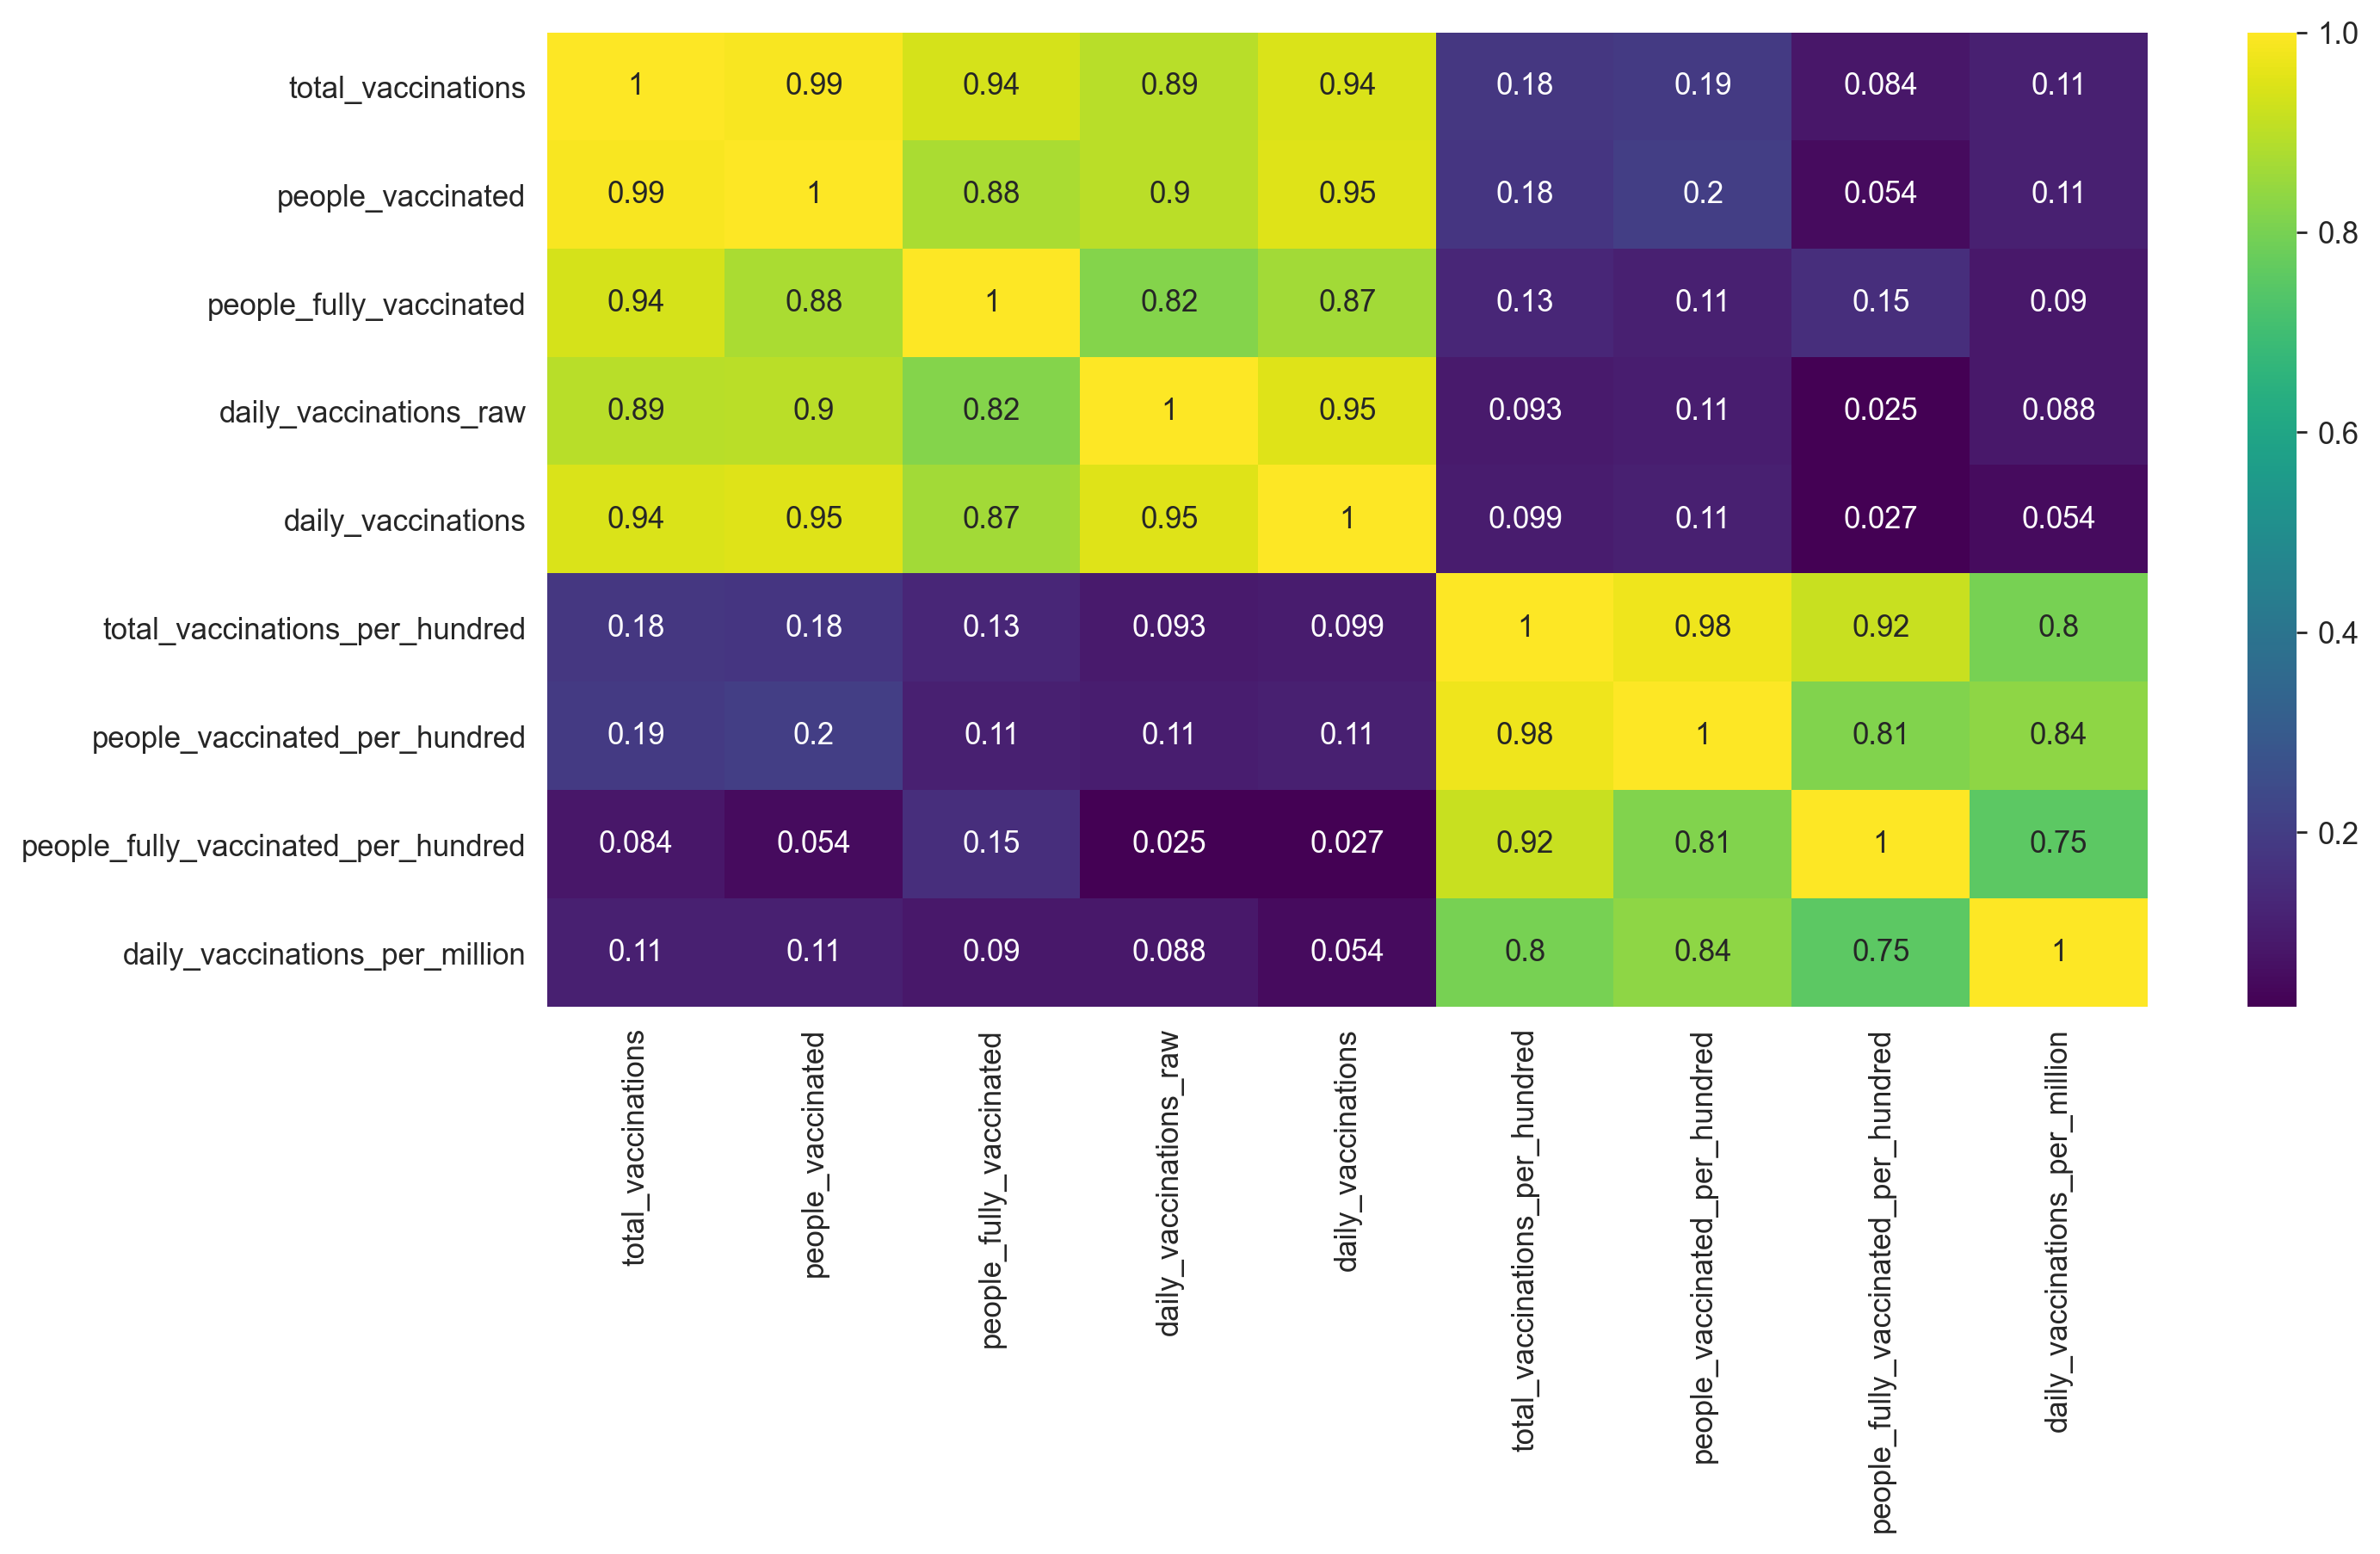

In [77]:
plt.figure(figsize=(12,6), dpi=250)
sns.heatmap(df2.corr(), cmap='viridis', annot=True)

### Clustermap
Los clustermap son muy parecidos a los heatmap, pero estos tratan de agrupar la data en clusters

In [95]:
# Para este caso se usará un dataframe que trae de ejemplo seaborn

df3 = sns.load_dataset('flights')
df3

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [96]:
# Agrupando los datos para dejarlos en forma matricial

df3_agrupado = df3.pivot_table(values='passengers',index='month',columns='year')

<AxesSubplot:xlabel='year', ylabel='month'>

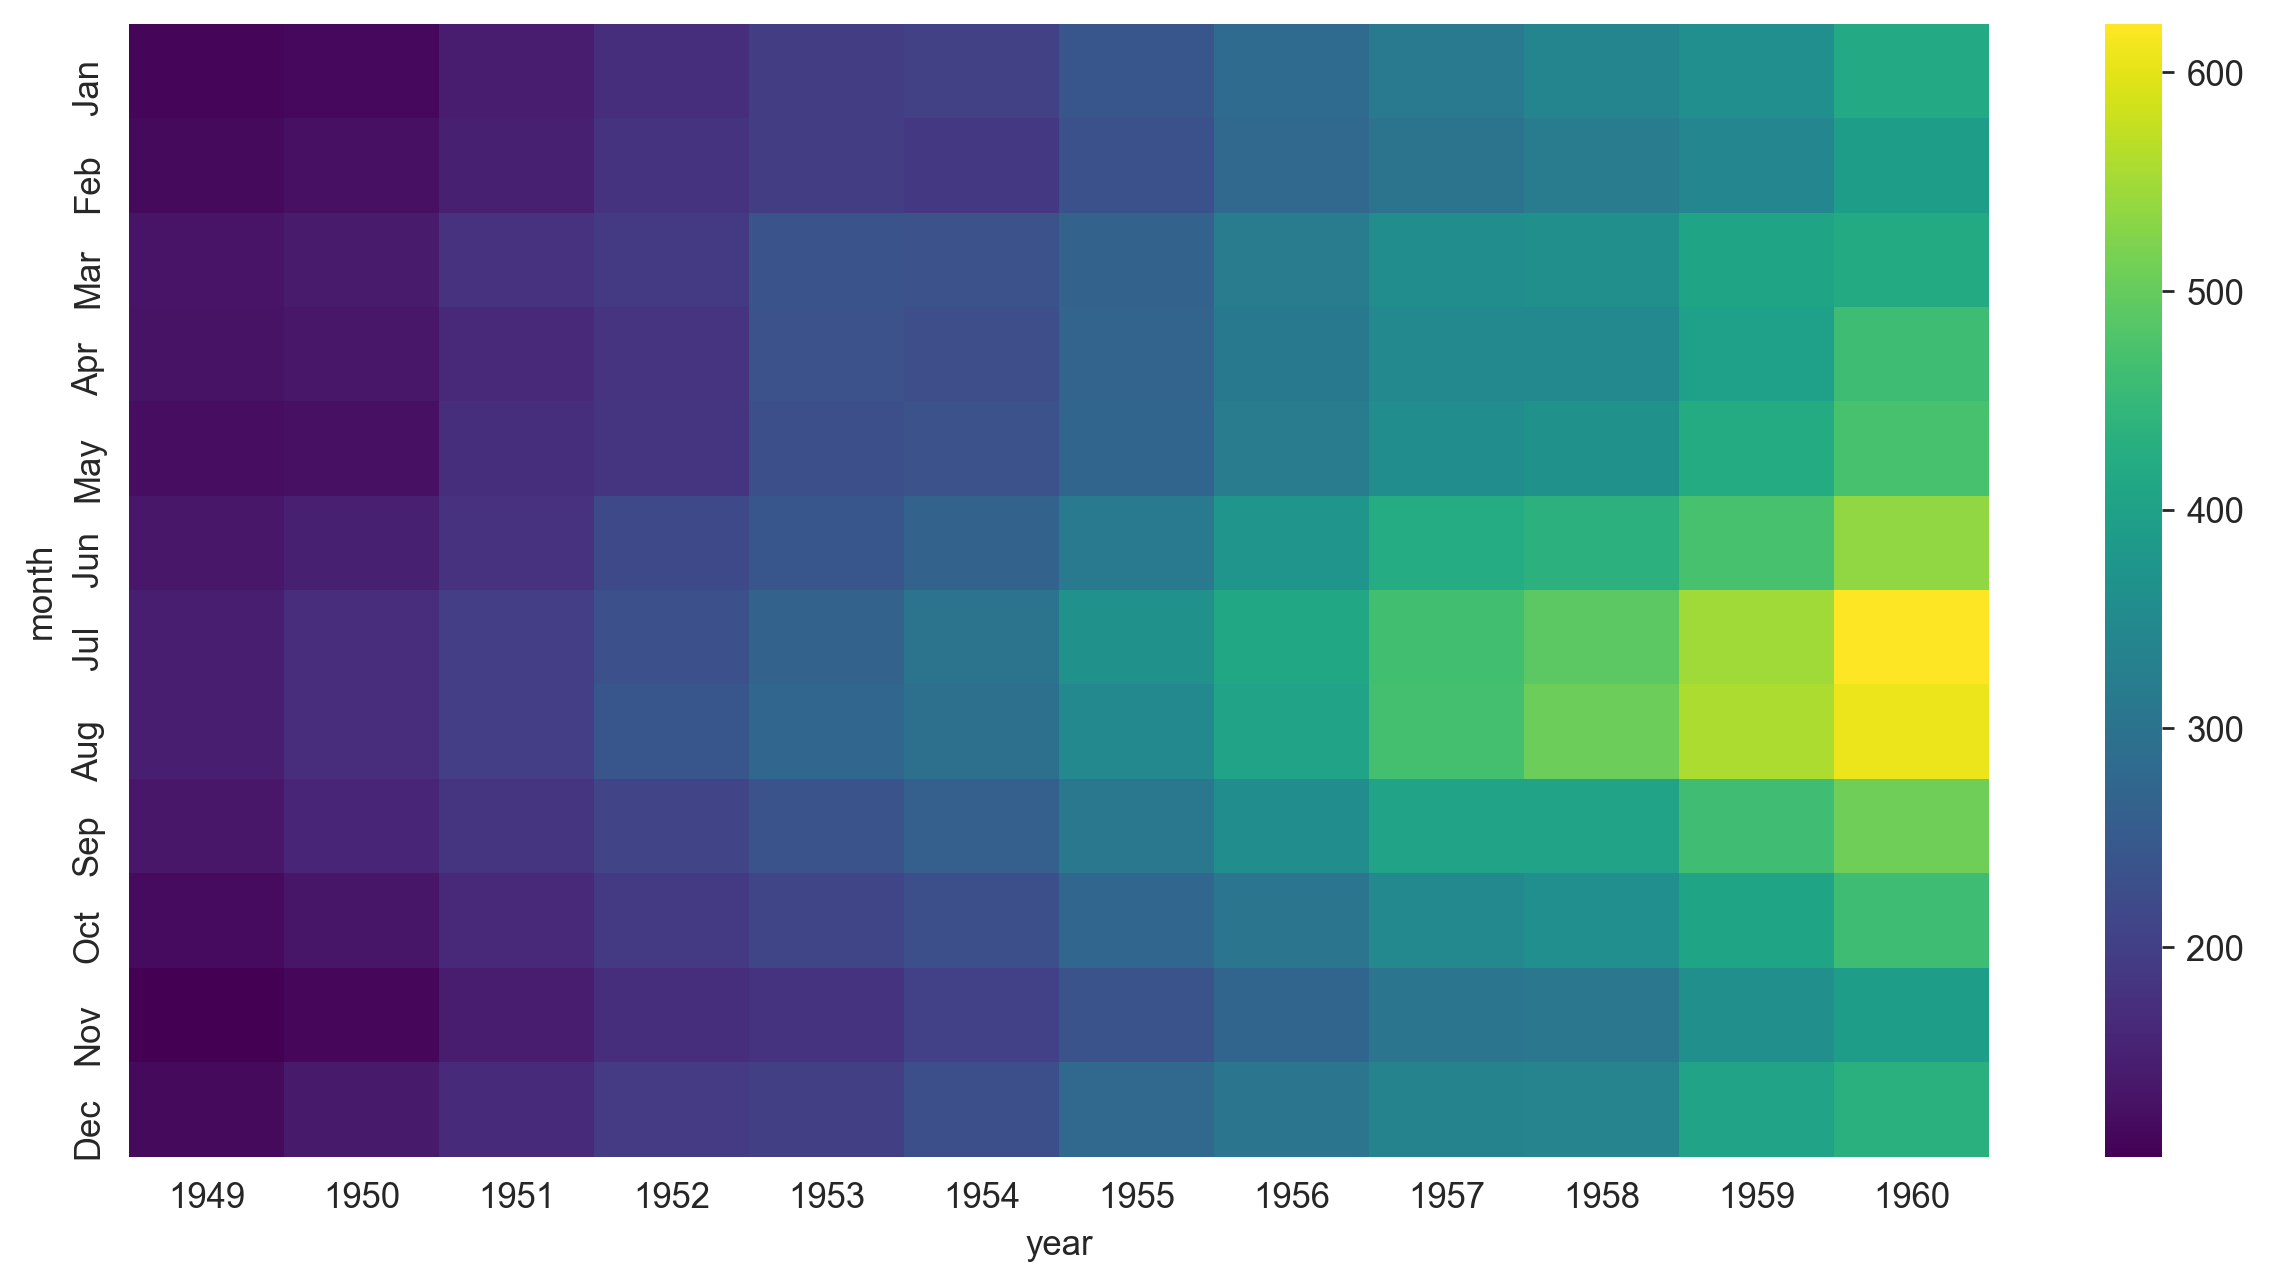

In [99]:
# heatmap de pasageros por fecha(año y mes)
plt.figure(figsize=(12,6), dpi=250)
sns.heatmap(df3_agrupado, cmap='viridis')

<Figure size 3000x1500 with 0 Axes>

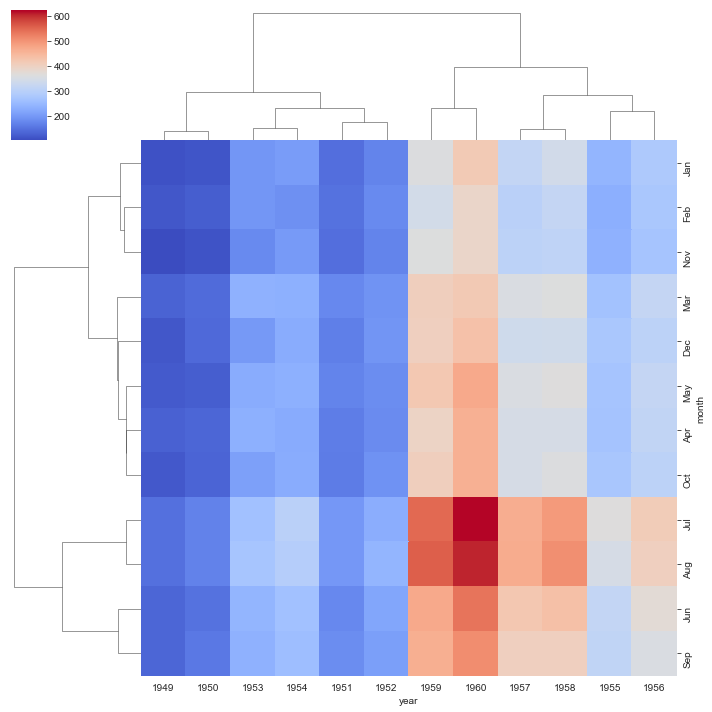

In [101]:
# Clustermap de los pasageros agrupados

plt.figure(figsize=(12,6), dpi=250)
sns.clustermap(df3_agrupado, cmap='coolwarm')

<Figure size 3000x1500 with 0 Axes>

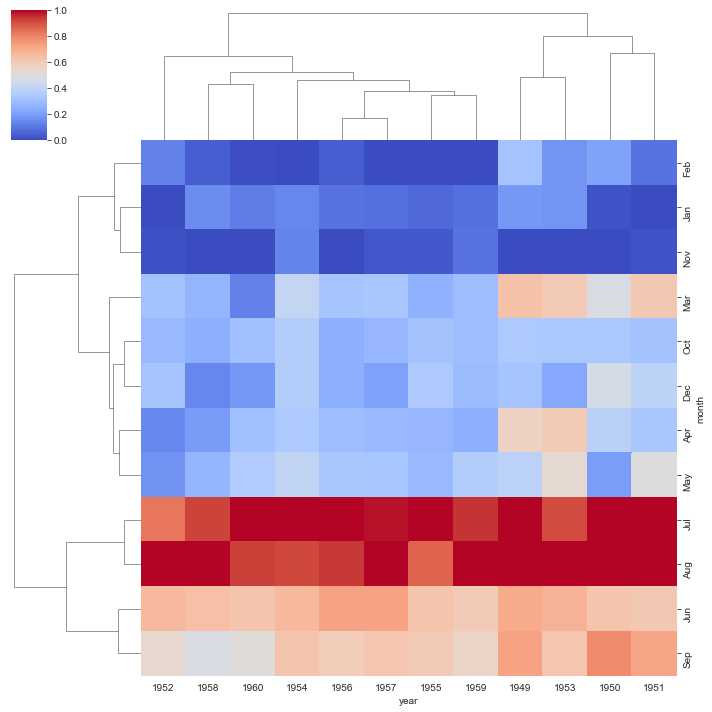

In [102]:
# Aplicando una pequeña normalizacion

plt.figure(figsize=(12,6), dpi=250)
sns.clustermap(df3_agrupado, cmap='coolwarm', standard_scale=1)

### Regression plots
Los plots de regresion son aquellos con capacidad de "predecir" una linea de tendencia adaptada a los datos. X predice Y

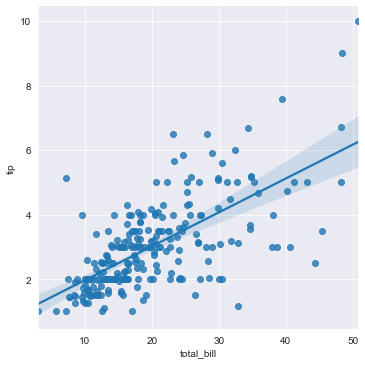

In [104]:
"""
    sns.lmplot(x,y,hue,palette,data)
"""

# Prediciendo la tendencia de propina segun el total gastado

sns.lmplot(x='total_bill', y='tip', data=df)

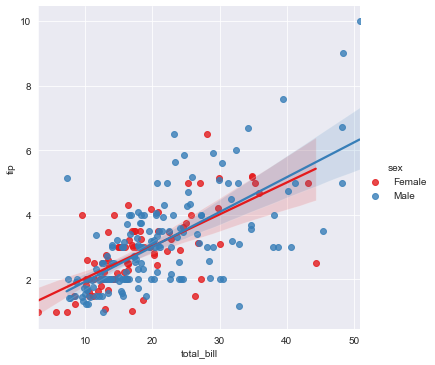

In [107]:
# ademas podemos establecer un hue, en este caso el sexo

sns.lmplot(x='total_bill', y='tip',hue='sex', palette='Set1', data=df)

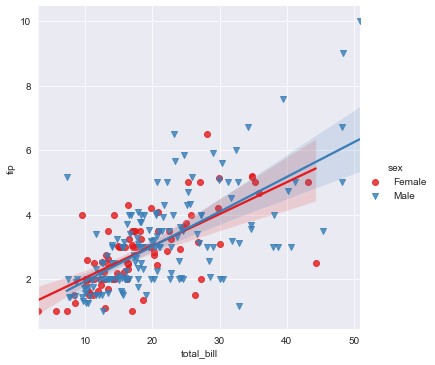

In [110]:
# lmplot nos permite personalizar los marcadores

sns.lmplot(x='total_bill', y='tip',hue='sex', palette='Set1', data=df, markers=['o', 'v'])

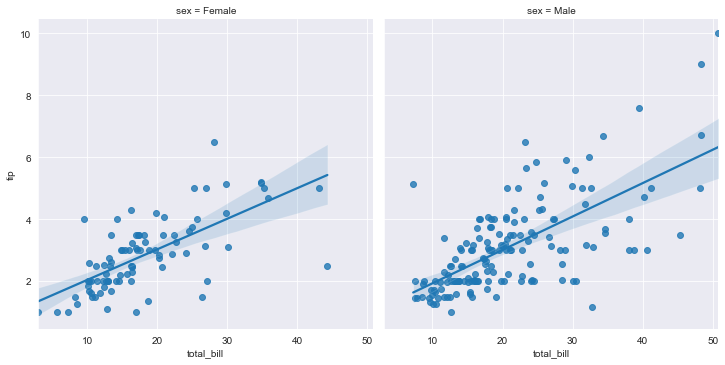

In [112]:
# Además podemos dividir este grafico en columnas

sns.lmplot(x='total_bill', y='tip',col='sex', data=df)

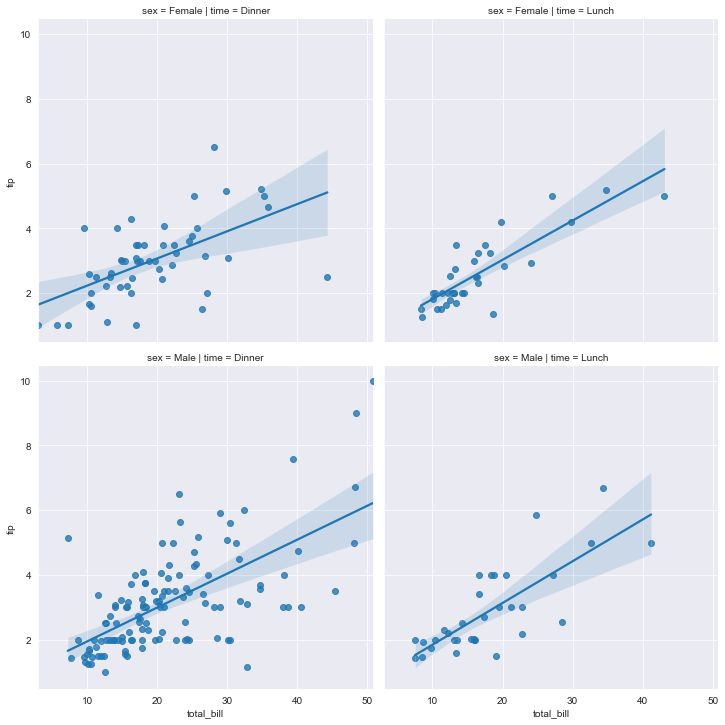

In [113]:
# Podemos separar por filas y columnas si asi lo deseamos

sns.lmplot(x='total_bill', y='tip',row='sex',col='time', data=df)

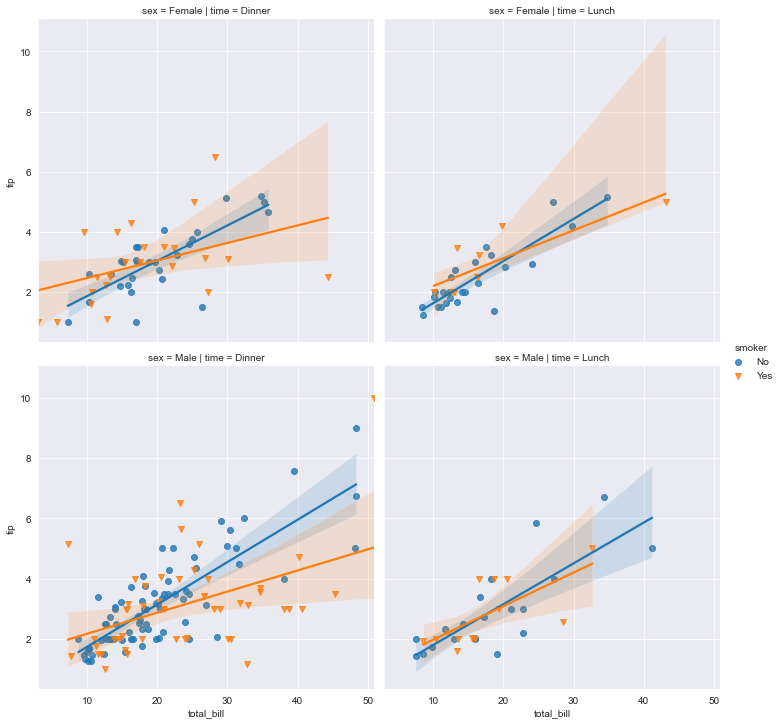

In [115]:
# Podemos hacer mas complejo el grafico agregando un hue

sns.lmplot(x='total_bill', y='tip',hue='smoker',row='sex',col='time', data=df, markers=['o', 'v'])

### Creando grillas con graficos personalizados con Facetgrid
facetgrid creará un grafico en blanco por cada dato categorico, por ejemplo por dia

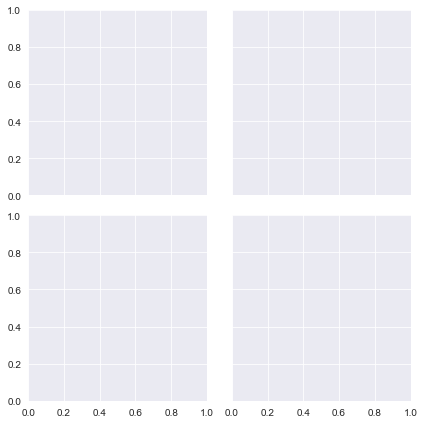

In [116]:
# Creando solo la grilla

g = sns.FacetGrid(df, col='time', row='smoker')

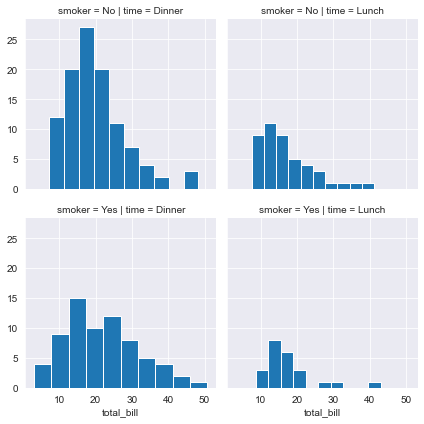

In [118]:
# mapeando los graficos a esa grilla

g = sns.FacetGrid(df, col='time', row='smoker')
g = g.map(plt.hist, "total_bill")